# import libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sympy as sp
import numpy as np
from sympy import *
from IPython.display import display, Math, Latex, HTML, Markdown
import math
from google.colab import drive


# exercise 2
from PIL import Image
from google.colab.patches import cv2_imshow
import skimage
import scipy
from scipy.ndimage import zoom
from scipy.interpolate import  griddata
from skimage import transform as tf
from skimage.transform import ProjectiveTransform
from scipy.ndimage import map_coordinates
import cv2

# exercise 4
from scipy.linalg import null_space
import numpy.linalg as lin
from numpy.linalg import inv
import scipy.linalg as linalg
from sympy.solvers.solveset import linsolve

# Load from drive

In [2]:
drive.mount("/content/drive", force_remount=True)
%cd '/content/drive/MyDrive/Colab Notebooks/V&P/assignment_geometricView'

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/V&P/assignment_geometricView


# Exercise 1.1


<IPython.core.display.Latex object>

The aim of this exercise is to construct three collinear points and show that are on a certain line L.

I choose arbitrary 2 points P1 and P2, and the other one will be inferred.

Eq(Eq(P1, Matrix([
[x1],
[y1],
[z1]])), Matrix([
[2],
[3],
[1]]))

Eq(Eq(P2, Matrix([
[x2],
[y2],
[z2]])), Matrix([
[4],
[6],
[1]]))

Eq(P3, Matrix([
[x3],
[y3],
[z3]]))

From the first 2 points chosen we evaluate the line as the cross product between them.

<IPython.core.display.Latex object>

Eq(L, Matrix([
[-3],
[ 2],
[ 0]]))

That is represented by the following equation:

<IPython.core.display.Latex object>

From this line with 1 DoF, has been chosen an arbitrary x value to determine the third point, in this case, has been chosen a value equal to 6.

Eq(Eq(P3, Matrix([
[x3],
[y3],
[z3]])), Matrix([
[6],
[9],
[1]]))

Below, are shown the collinear points and the line.

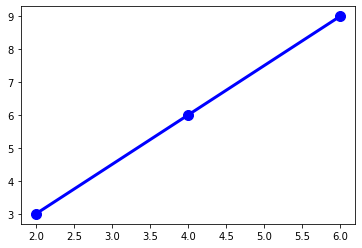

To conclude has been verified that these 3 points are collinear and has been proven that each one lies on the line L, using the following formula:

<IPython.core.display.Latex object>

Eq(Eq(check1, Matrix([[l1*x1 + l2*y1 + l3*z1]])), 0)

<IPython.core.display.Latex object>

Eq(Eq(check2, Matrix([[l1*x2 + l2*y2 + l3*z2]])), 0)

<IPython.core.display.Latex object>

Eq(Eq(check3, Matrix([[l1*x3 + l2*y3 + l3*z3]])), 0)

<IPython.core.display.Latex object>

From these results, we can establish the collinear property of the three points.

In [3]:
""" 
****************************************************************************************************
**************************************** Simpy symbols *********************************************
****************************************************************************************************
"""

x1,y1,x2,y2,x3,y3,z1,z2,z3,l1,l2,l3,L = sp.symbols('x1,y1,x2,y2,x3,y3,z1,z2,z3,l1,l2,l3,L', real = True)

P1,P2,P3 = sp.symbols("P1,P2,P3", real = True)

X1p,X2p,X3p = sp.symbols("X1',X2',X3'", real = True)

l1p,l2p,l3p = sp.symbols("l1',l2',l3'", real = True)

h11,h12,h13,h21,h22,h23,h31,h32,h33 = symbols('h11,h12,h13,h21,h22,h23,h31,h32,h33', real = True)

L = Matrix([l1,l2,l3])
L_values = L.subs([(l1, -1.5), (l2, 1), (l3,0)])

P1 = Matrix([x1,y1,z1])
P1_values = P1.subs([(x1, 2), (y1, 3), (z1,1)])

P2 = Matrix([x2,y2,z2])
P2_values = P2.subs([(x2, 4), (y2, 6), (z2,1)])

P3 = Matrix([x3,y3,z3])
P3_values = P3.subs([(x3, 6), (y3, 9), (z3,1)])


""" 
****************************************************************************************************
************************************ Simpy implementation ******************************************
****************************************************************************************************
"""

display(Latex('$\\bold{Exercise: 1.1}$'))
print("\n");

display(Markdown("The aim of this exercise is to construct three collinear points and show that are on a certain line L."))

print("\n");

display(Markdown("I choose arbitrary 2 points P1 and P2, and the other one will be inferred."))

print("\n");


display(Eq(Eq(S('P1'), P1, evaluate=False), P1_values, evaluate=False))
print("\n");

display(Eq(Eq(S('P2'), P2, evaluate=False), P2_values, evaluate=False))
print("\n");

display(Eq(S('P3'), P3, evaluate=False))
print("\n");

display(Markdown("From the first 2 points chosen we evaluate the line as the cross product between them."))
print("\n")

display(Latex(r'${L} = \vec{P_1}\times\vec{P_2}$'))
print("\n")
L = P1.cross(P2)
L_values = P1_values.cross(P2_values)
display(Eq(S('L'), L_values, evaluate=False))

print("\n")
display(Markdown("That is represented by the following equation:"))
display(Latex(r'$y = \dfrac{3}{2}x$'))

print("\n")
display(Markdown("From this line with 1 DoF, has been chosen an arbitrary x value to determine the third point, in this case, has been chosen a value equal to 6."))
print("\n")

display(Eq(Eq(S('P3'), P3, evaluate=False), P3_values, evaluate=False))
print("\n");

display(Markdown("Below, are shown the collinear points and the line."))

x_points =[2,4,6];y_points=[3,6,9]

plt.plot(x_points, y_points, label='line', marker='o', markersize=10, color= "blue", linewidth=3)
plt.show()

print("\n")

display(Markdown("To conclude has been verified that these 3 points are collinear and has been proven that each one lies on the line L, using the following formula:"))

L = Matrix([l1,l2,l3])
print("\n")
display(Latex(r'${L^T}P_1 = 0$'))
check1 = L_values.dot(P1_values);
display(Eq(Eq(S('check1'), transpose(L)*P1, evaluate=False), check1, evaluate=False))

print("\n")
display(Latex(r'${L^T}P_2 = 0$'))
check2 = L_values.dot(P2_values);
display(Eq(Eq(S('check2'), transpose(L)*P2, evaluate=False), check2, evaluate=False))

print("\n")
display(Latex(r'${L^T}P_3 = 0$'))
check3 = L_values.dot(P3_values);
display(Eq(Eq(S('check3'), transpose(L)*P3, evaluate=False), check3, evaluate=False))

print("\n")

display(Latex("$\\textbf{Conclusion:}$"))
display(Markdown('From these results, we can establish the collinear property of the three points.'))


# Exercise 1.2



<IPython.core.display.Latex object>

In this exercise we want to show that, starting from three points: P1,P2 and P3 on a line L, a projective transformation maps new points: P1',P2',P3' that are collinear on a new line L'.

I decide to reuse both the points and the line defined in the previous exercise.

Eq(Eq(P1, Matrix([
[x1],
[y1],
[z1]])), Matrix([
[2],
[3],
[1]]))

Eq(Eq(P2, Matrix([
[x2],
[y2],
[z2]])), Matrix([
[4],
[6],
[1]]))

Eq(Eq(P2, Matrix([
[x3],
[y3],
[z3]])), Matrix([
[6],
[9],
[1]]))

Given the fact of having collinear points, we already know that each one lies on the line L.

we define the parameters which build up the projective transformation matrix H.

Eq(Eq(α, alpha), 45)

Eq(Eq(s1, s1), 2.0)

Eq(Eq(s2, s2), 3.0)

Eq(Eq(t, Matrix([
[t1],
[t2]])), Matrix([
[2.0],
[1.0]]))

Eq(Eq(v, Matrix([
[v1],
[v2]])), Matrix([
[0.3],
[0.5]]))

Eq(Eq(H, Matrix([
[h11, h12, h13],
[h21, h22, h23],
[h31, h32, h33]])), Matrix([
[1.42, -2.13, 2.0],
[2.13,  1.42, 1.0],
[ 0.3,   0.5,   1]]))

It's now possible to construct the new points making the cross product between the points and the homography.

Eq(Eq(H*P1, Matrix([
[h11*x1 + h21*y1 + h31*z1],
[h12*x1 + h22*y1 + h32*z1],
[h13*x1 + h23*y1 + h33*z1]])), Matrix([
[-1.55],
[ 9.52],
[  3.1]]))

Eq(Eq(H*P2, Matrix([
[h11*x2 + h21*y2 + h31*z2],
[h12*x2 + h22*y2 + h32*z2],
[h13*x2 + h23*y2 + h33*z2]])), Matrix([
[ -5.1],
[18.04],
[  5.2]]))

Eq(Eq(H*P3, Matrix([
[h11*x3 + h21*y3 + h31*z3],
[h12*x3 + h22*y3 + h32*z3],
[h13*x3 + h23*y3 + h33*z3]])), Matrix([
[-8.65],
[26.56],
[  7.3]]))

Therefore, we have found the following new points:

Eq(Eq(H*X, Matrix([
[-1.55,  -5.1, -8.65],
[ 9.52, 18.04, 26.56],
[  3.1,   5.2,   7.3]])), Matrix([[P1', P2', P3']]))

We compute the transformation also for the line L. First, it's computed the inverse transposed of H.

With this passage, we also demonstrate that the H matrix is non-singular (key property for H), hence, invertible.

Eq(H^{-T}, Matrix([
[ 0.142, -0.282, 0.0986],
[ 0.483,  0.126, -0.208],
[-0.767,  0.438,   1.01]]))

We transform L.

Eq(Eq(H^{-T}L, Matrix([
[-0.495],
[-0.598],
[  1.59]])), L')

All the points and lines are represented in the below plot.

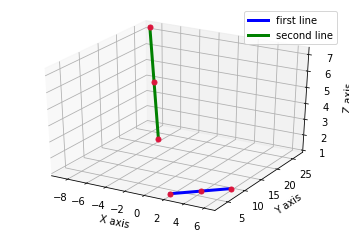

The last step is to verify that each new point is on the line L' with the following operation.

<IPython.core.display.Latex object>

Eq(Eq({L'^T}P1', Matrix([[l1'*x1' + l2'*y1' + l3'*z1']])), 0)

Eq(Eq({L'^T}P2', Matrix([[l1'*x2' + l2'*y2' + l3'*z2']])), 0)

Eq(Eq({L'^T}P3', Matrix([[l1'*x3' + l2'*y3' + l3'*z3']])), 0)

<IPython.core.display.Latex object>

Since all the results obtained are equal to zero, we have proven that all the new points are on the new line.

In [4]:
""" 
****************************************************************************************************
**************************************** Simpy symbols *********************************************
****************************************************************************************************
"""

x1,y1,x2,y2,x3,y3,z1,z2,z3,l1,l2,l3,L = sp.symbols('x1,y1,x2,y2,x3,y3,z1,z2,z3,l1,l2,l3,L', real = True)
x1p,y1p,x2p,y2p,x3p,y3p,z1p,z2p,z3p = sp.symbols("x1',y1',x2',y2',x3',y3',z1',z2',z3'", real = True)

P1,P2,P3 = sp.symbols("P1,P2,P3", real = True)

X1p,X2p,X3p = sp.symbols("P1',P2',P3'", real = True)

Lp,l1p,l2p,l3p = sp.symbols("L',l1',l2',l3'", real = True)

L = Matrix([l1,l2,l3])

L_values = L.subs([(l1, -1.5), (l2, 1), (l3,0)])

P1 = Matrix([x1,y1,z1])

P1_values = P1.subs([(x1, 2), (y1, 3), (z1,1)])

P2 = Matrix([x2,y2,z2])

P2_values = P2.subs([(x2, 4), (y2, 6), (z2,1)])

P3 = Matrix([x3,y3,z3])

P3_values = P3.subs([(x3, 6), (y3, 9), (z3,1)])


alpha,s1,s2,t,v,V,t1,t2,v1,v2 = sp.symbols('alpha,s1,s2,t,v,V,t1,t2,v1,v2', real = True)

h11,h12,h13,h21,h22,h23,h31,h32,h33 = sp.symbols('h11,h12,h13,h21,h22,h23,h31,h32,h33', real = True)


""" 
****************************************************************************************************
************************************ Simpy implementation ******************************************
****************************************************************************************************
"""

display(Latex('$\\bold{Exercise: 1.2}$'))
print("\n");
display(Markdown("In this exercise we want to show that, starting from three points: P1,P2 and P3 on a line L, a projective transformation maps new points: P1',P2',P3' that are collinear on a new line L'."))
print("\n");
display(Markdown("I decide to reuse both the points and the line defined in the previous exercise."))

print("\n");
display(Eq(Eq(S('P1'), P1, evaluate=False), P1_values, evaluate=False))
print("\n");

display(Eq(Eq(S('P2'), P2, evaluate=False), P2_values, evaluate=False))
print("\n");

display(Eq(Eq(S('P2'), P3, evaluate=False), P3_values, evaluate=False))
print("\n");

display(Markdown("Given the fact of having collinear points, we already know that each one lies on the line L."))

cross = symbols('×')

display(Markdown("we define the parameters which build up the projective transformation matrix H."))

t = Matrix([t1,t2])
v = Matrix([v1,v2])

t_values = t.subs([(t1, 2.0), (t2, 1.0)])
alpha_value = alpha.subs([(alpha, 45)])
s1_value = s1.subs([(s1, 2.0)])
s2_value = s2.subs([(s2, 3.0)])
v_values = v.subs([(v1, 0.3), (v2, 0.5)])
V_value = V.subs([(V, 1.0)])  

display(Eq(Eq(S('α'), alpha, evaluate=False), alpha_value, evaluate=False))
print("\n");
display(Eq(Eq(S('s1'), s1, evaluate=False), s1_value, evaluate=False))
print("\n");
display(Eq(Eq(S('s2'), s2, evaluate=False), s2_value, evaluate=False))
print("\n");
display(Eq(Eq(S('t'), t, evaluate=False), t_values, evaluate=False))
print("\n");
display(Eq(Eq(S('v'), v, evaluate=False), v_values, evaluate=False))
print("\n");

cos_alpha = round(math.cos(math.radians(alpha_value)), 2)
sin_alpha = round(math.sin(math.radians(alpha_value)), 2)

H = sp.Matrix([[h11, h12, h13],[h21, h22, h23],[h31, h32, h33]])
H_values = H.subs([(h11,cos_alpha*s1_value), (h12,-(sin_alpha*s2_value)), (h13,t_values[0]), (h21,sin_alpha*s2_value), (h22,cos_alpha*s1_value), (h23,t_values[1]), (h31,v_values[0]), (h32,v_values[1]), (h33,1)])
display(Eq(Eq(S('H'), H, evaluate=False), H_values, evaluate=False))
print("\n")

display(Markdown("It's now possible to construct the new points making the cross product between the points and the homography."))
print("\n")

result_h_p1 = (H_values)*(P1_values)

display(Eq(Eq(S('H*P1'), transpose(H)*P1, evaluate=False), result_h_p1, evaluate=False))
print("\n")
result_h_p2 = (H_values)*(P2_values)

display(Eq(Eq(S('H*P2'), transpose(H)*P2, evaluate=False), result_h_p2, evaluate=False))
print("\n")
result_h_p3 = (H_values)*(P3_values)

display(Eq(Eq(S('H*P3'), transpose(H)*P3, evaluate=False), result_h_p3, evaluate=False))
print("\n")

display(Markdown("Therefore, we have found the following new points:"))
print("\n")
old_points = Matrix([transpose(P1_values), transpose(P2_values), transpose(P3_values)])
new_points  = Matrix([X1p,X2p,X3p])
display(Eq(Eq(S('H*X'), H_values*transpose(old_points), evaluate=False), transpose(new_points), evaluate=False))
print("\n")
display(Markdown("We compute the transformation also for the line L. First, it's computed the inverse transposed of H."))
display(Markdown("With this passage, we also demonstrate that the H matrix is non-singular (key property for H), hence, invertible."))
print("\n")

inv_transpose_H = transpose(H.inv())
result_h_L = transpose(H_values.inv()).evalf(3)
display(Eq(Symbol('H^{-T}'), result_h_L, evaluate=False))
print("\n")
display(Markdown("We transform L."))
print("\n")
result_Lp = ((result_h_L) * (L_values)).evalf(3)
display(Eq(Eq(Symbol('H^{-T}L'), result_Lp , evaluate=False), Lp , evaluate=False))
print("\n")

# plotting lines and points
display(Markdown("All the points and lines are represented in the below plot."))

ax = plt.axes(projection='3d')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

ax.plot3D([P1_values[0], P3_values[0]], [P1_values[1], P3_values[1]], [P1_values[2], P3_values[2]], color="blue", linewidth=3, label='first line')
ax.plot3D([P1_values[0]], [P1_values[1]], [P1_values[2]], color="crimson", marker='o', markersize=5)
ax.plot3D([P2_values[0]], [P2_values[1]], [P2_values[2]], color="crimson", marker='o', markersize=5)
ax.plot3D([P3_values[0]], [P3_values[1]], [P3_values[2]], color="crimson", marker='o', markersize=5)

ax.plot3D([result_h_p1[0], result_h_p3[0]], [result_h_p1[1], result_h_p3[1]], [result_h_p1[2], result_h_p3[2]], color="green", linewidth=3, label='second line')
ax.plot3D([result_h_p1[0]], [result_h_p1[1]], [result_h_p1[2]], color="crimson", marker='o', markersize=5)
ax.plot3D([result_h_p2[0]], [result_h_p2[1]], [result_h_p2[2]], color="crimson", marker='o', markersize=5)
ax.plot3D([result_h_p3[0]], [result_h_p3[1]], [result_h_p3[2]], color="crimson", marker='o', markersize=5)

plt.legend()
plt.show()

print("\n")

display(Markdown("The last step is to verify that each new point is on the line L' with the following operation."))
print('\n')
display(Latex(r"${L'^T}P' = {P'^T}L' = 0$"))
print('\n')
Lp = Matrix([l1p, l2p, l3p])
X1p = Matrix([x1p, y1p, z1p]);
X2p = Matrix([x2p, y2p, z2p]);
X3p = Matrix([x3p, y3p, z3p]);

check1 = int(round((transpose(result_Lp).dot(result_h_p1)),0))
display(Eq(Eq(Symbol("{L'^T}P1'"), transpose(Lp)*X1p, evaluate=False), check1, evaluate=False))
print("\n")
check2 = int(round((transpose(result_Lp).dot(result_h_p2)),0))
display(Eq(Eq(Symbol("{L'^T}P2'"), transpose(Lp)*X2p, evaluate=False), check2, evaluate=False))
print("\n")
check3 = int(round((transpose(result_Lp).dot(result_h_p3)),0))
display(Eq(Eq(Symbol("{L'^T}P3'"), transpose(Lp)*X3p, evaluate=False), check3, evaluate=False))
print("\n")

display(Latex("$\\textbf{Conclusion:}$"))
display(Markdown("Since all the results obtained are equal to zero, we have proven that all the new points are on the new line."))


# Exercise 2.1, 2.2 \& 2.3

In [8]:
""" 
****************************************************************************************************
**************************** definition of functions for exercise 2.0 ******************************
****************************************************************************************************
"""

def image_rebound(mm,nn,hh):
    W = np.array([[1, nn, nn, 1 ],[1, 1, mm, mm],[ 1, 1, 1, 1]])
    ws = np.dot(hh,W)
    xx = np.vstack((ws[2,:],ws[2,:],ws[2,:]))
    wsX =  np.round(ws/xx)
    bounds = [np.min(wsX[1,:]), np.max(wsX[1,:]),np.min(wsX[0,:]), np.max(wsX[0,:])]
    return bounds

def make_transform(imm,hh):   
    mm,nn = imm.shape[0],imm.shape[0]
    bounds = image_rebound(mm,nn,hh)
    nrows = bounds[1] - bounds[0]
    ncols = bounds[3] - bounds[2]
    s = max(nn,mm)/max(nrows,ncols)
    scale = np.array([[s, 0, 0],[0, s, 0], [0, 0, 1]])
    trasf = scale@hh
    trasf_prec =  np.linalg.inv(trasf)
    bounds = image_rebound(mm,nn,trasf)
    nrows = (bounds[1] - bounds[0]).astype(np.int)
    ncols = (bounds[3] - bounds[2]).astype(np.int)
    return bounds, nrows, ncols, trasf, trasf_prec

def normalize_points(zz):  # lista di punti 4x3
    uu = np.transpose(zz) #.T
    ff_xx = np.ones(uu.shape)# 3x4
    indices, = np.where(abs(uu[2,:]) > 10**-12)
    ff_xx[0:2,indices] = uu[0:2,indices]/uu[2,indices]
    ff_xx[2,indices]  = 1.
    mu = np.mean(ff_xx[0:2,:],axis = 1)
    mu_r = np.zeros((mu.shape[0],ff_xx.shape[1]))
    for ii in range(ff_xx.shape[1]):
        mu_r[:,ii] = mu
    mu_dist = np.mean((np.sum((ff_xx[0:2] - mu_r)**2,axis =0))**0.5)
    scale =  (2**0.5/mu_dist)
    s0 = -scale*mu[0]
    s1 = -scale*mu[1]
    S = np.array([[scale, 0, s0],[0, scale, s1], [0, 0, 1]])
    normalized_zz = S@ff_xx
    return normalized_zz, S

def get_new_image(nrows,ncols,imm,bounds,trasf_prec,nsamples):
    xx  = np.linspace(1, ncols, ncols)
    yy  = np.linspace(1, nrows, nrows)
    [xi,yi] = np.meshgrid(xx,yy) 
    a0 = np.reshape(xi, -1,order ='F')+bounds[2]
    a1 = np.reshape(yi,-1, order ='F')+bounds[0]
    a2 = np.ones((ncols*nrows))
    uv = np.vstack((a0.T,a1.T,a2.T)) 
    new_trasf = np.dot(trasf_prec,uv)
    val_normalization = np.vstack((new_trasf[2,:],new_trasf[2,:],new_trasf[2,:]))
   
    ### The new transformation
    newT = new_trasf/val_normalization
    
    ### 
    xi = np.reshape(newT[0,:],(nrows,ncols),order ='F') 
    yi = np.reshape(newT[1,:],(nrows,ncols),order ='F')
    cols = imm.shape[1]
    rows = imm.shape[0]
    xxq  = np.linspace(1, rows, rows).astype(np.int)
    yyq  = np.linspace(1, cols, cols).astype(np.int)
    [x,y] = np.meshgrid(yyq,xxq) 
    x = (x - 1).astype(np.int) #Offset x and y relative to region origin.
    y = (y - 1).astype(np.int) 
        
    ix = np.random.randint(im.shape[1], size=nsamples)
    iy = np.random.randint(im.shape[0], size=nsamples)
    samples = im[iy,ix]
       
    int_im = griddata((iy,ix), samples, (yi,xi))

    return int_im

def round_(x):
  return round(x,6)

""" 
****************************************************************************************************
**************************************** Simpy symbols *********************************************
****************************************************************************************************
"""

x1,y1,x2,y2,x3,y3,z1,z2,z3,x4,y4,z4,l1,l2,l3,l4 = sp.symbols('x1,y1,x2,y2,x3,y3,z1,z2,z3,x4,y4,z4,l1,l2,l3,l4', real = True)
x1p,y1p,x2p,y2p,x3p,y3p,z1p,z2p,z3p,x4p,y4p,z4p = sp.symbols("x1',y1',x2',y2',x3',y3',z1',z2',z3',x4',y4',z4'", real = True)
P1,P2,P3,P4 = sp.symbols("P1,P2,P3,P4", real = True)
L1,L2,L3,L4 = sp.symbols("L1,L2,L3,L4", real = True)
X1p,X2p,X3p,X4p = sp.symbols("P1',P2',P3',P4'", real = True)
Lp,l1p,l2p,l3p,l4p = sp.symbols("L',l1',l2',l3',l4'", real = True)

L = Matrix([l1,l2,l3,l4])
P1 = Matrix([x1,y1,z1])
P2 = Matrix([x2,y2,z2])
P3 = Matrix([x3,y3,z3])
P4 = Matrix([x4,y4,z4])

# vanishing points and line
v1x,v1y,v1z,v2x,v2y,v2z,vlx,vly,vlz = sp.symbols('v_{1x},v_{1y},v_{1z},v_{2x},v_{2y},v_{2z},v_{lx},v_{ly},v_{lz} ', real = True)
v1,v2,vl = sp.symbols('V_{1},V_{2},VL', real = True)
v1_matrix = Matrix([v1x,v1y,v1z])
v2_matrix = Matrix([v2x,v2y,v2z])
vl_matrix = Matrix([vlx,vly,vlz])

# homographies
alpha,s1,s2,t,v,V,t1,t2,v1h,v2h = sp.symbols('alpha,s1,s2,t,v,V,t1,t2,v1,v2', real = True) # symbols for H
h11,h12,h13,h21,h22,h23,h31,h32,h33 = sp.symbols('h11,h12,h13,h21,h22,h23,h31,h32,h33', real = True)

Hp,Ha,H = sp.symbols("H_{p},H_{a},H", real = True)
Hp = sp.Matrix([[h11, h12, h13],[h21, h22, h23],[h31, h32, h33]])
 
t = Matrix([t1,t2])
v = Matrix([v1h,v2h])

t_values = t.subs([(t1, 1.5), (t2, 1.3)])
alpha_value = alpha.subs([(alpha, 30)])
s1_value = s1.subs([(s1, 2.0)])
s2_value = s2.subs([(s2, 0.5)])
v_values = v.subs([(v1h, 0.0), (v2h, 0.0)])


cos_alpha = round(math.cos(math.radians(alpha_value)), 3)
sin_alpha = round(math.sin(math.radians(alpha_value)), 3)

Ha = sp.Matrix([[h11, h12, h13],[h21, h22, h23],[h31, h32, h33]])
Ha_values = Ha.subs([(h11,cos_alpha*s1_value), (h12,-(sin_alpha*s2_value)), (h13,t_values[0]), (h21,sin_alpha*s2_value), (h22,cos_alpha*s1_value), (h23,t_values[1]), (h31,v_values[0]), (h32,v_values[1]), (h33,1)])
 


<IPython.core.display.Latex object>

The objective of this exercise is to recover parallel lines on the image, in a way of having tiles that appear parallel.

The first step of this exercise consists of defining four segments on the parallel sides of an arbitrary tile, that are present in the following image:

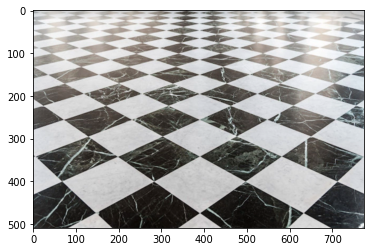

Two segments are in one direction (parallel in the not distorted image) and the others 2 are orthogonal to those ones.

In order to define these segments we need to select four points on the image, that are:

Eq(Eq(P1, Matrix([
[x1],
[y1],
[z1]])), Matrix([
[390.5],
[342.5],
[    1]]))

Eq(Eq(P2, Matrix([
[x2],
[y2],
[z2]])), Matrix([
[497.5],
[400.5],
[    1]]))

Eq(Eq(P3, Matrix([
[x3],
[y3],
[z3]])), Matrix([
[583.0],
[342.0],
[    1]]))

Eq(Eq(P4, Matrix([
[x4],
[y4],
[z4]])), Matrix([
[477.5],
[295.0],
[    1]]))

Segments and points are shown below directly on the image

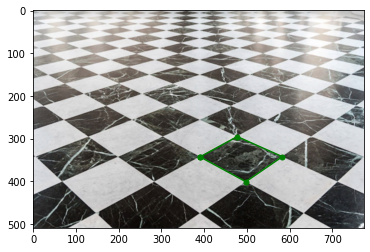

These Segments belongs to a set of lines that we need to compute.

Before compute analytically the calculus of the lines matrices, we normalize the points obtaining the following result:

Eq(Eq(P1, Matrix([
[x1],
[y1],
[z1]])), Matrix([
[ -1.82223],
[-0.047147],
[      1.0]]))

Eq(Eq(P2, Matrix([
[x2],
[y2],
[z2]])), Matrix([
[ 0.19566],
[1.046662],
[     1.0]]))

Eq(Eq(P3, Matrix([
[x3],
[y3],
[z3]])), Matrix([
[ 1.808086],
[-0.056576],
[      1.0]]))

Eq(Eq(P4, Matrix([
[x4],
[y4],
[z4]])), Matrix([
[-0.181516],
[-0.942939],
[      1.0]]))

The corresponding lines are then:

<IPython.core.display.Latex object>

Eq(Matrix([
[ y1*z2 - y2*z1],
[-x1*z2 + x2*z1],
[ x1*y2 - x2*y1]]), Matrix([
[-1.09381],
[ 2.01789],
[-1.89803]]))

<IPython.core.display.Latex object>

Eq(Matrix([
[-y3*z4 + y4*z3],
[ x3*z4 - x4*z3],
[-x3*y4 + x4*y3]]), Matrix([
[-0.886363],
[   1.9896],
[  1.71518]]))

<IPython.core.display.Latex object>

Eq(Matrix([
[-y1*z4 + y4*z1],
[ x1*z4 - x4*z1],
[-x1*y4 + x4*y1]]), Matrix([
[-0.895792],
[ -1.64071],
[ -1.70969]]))

<IPython.core.display.Latex object>

Eq(Matrix([
[-y2*z3 + y3*z2],
[ x2*z3 - x3*z2],
[-x2*y3 + x3*y2]]), Matrix([
[-1.10324],
[-1.61243],
[ 1.90352]]))

The subsequent steps are the computation of the two vanishing points and the corresponding vanishing line.

Starting from the vanishing points, we have:

<IPython.core.display.Latex object>

Eq(Eq(V_{1}, Matrix([
[v_{1x}],
[v_{1y}],
[v_{1z}]])), Matrix([
[-7.23738],
[-3.55843],
[0.387661]]))

<IPython.core.display.Latex object>

Eq(Eq(V_{2}, Matrix([
[v_{2x}],
[v_{2y}],
[v_{2z}]])), Matrix([
[ 5.87989],
[-3.59136],
[  0.3657]]))

We define the vanishing line as the line that lies on V1 and V2.

<IPython.core.display.Latex object>

Eq(Eq(VL, Matrix([
[v_{lx}],
[v_{ly}],
[v_{lz}]])), Matrix([
[0.0909142],
[  4.92612],
[  46.9153]]))

Having obtained the vanishing line, it's now possible to compute the projectivity transformation Hp.

Eq(Eq(H_p, Matrix([
[h11, h12, h13],
[h21, h22, h23],
[h31, h32, h33]])), Matrix([
[       1,        0,         0],
[       0,        1,         0],
[0.090915, 4.926131, 46.915258]]))

Then we define:

<IPython.core.display.Latex object>

With Ha an affine transformation. We want to test that:

<IPython.core.display.Latex object>

Therefore, given the fact that lines transform covariantly, we want to show that H maps the vanishing line to the line at infinity.

Ha has been arbitrarily  chosen: (this matrix has been already used in the other exercise)

Eq(Eq(Ha, Matrix([
[h11, h12, h13],
[h21, h22, h23],
[h31, h32, h33]])), Matrix([
[1.732, -0.25, 1.5],
[ 0.25, 1.732, 1.3],
[  0.0,   0.0,   1]]))

H is carried out and then computed this test:

Eq(H, Matrix([
[ 1.86837,  7.1392, 70.3729],
[ 0.36819, 8.13597, 60.9898],
[0.090915, 4.92613, 46.9153]]))

Eq({H^{-T}}l^{T}, Matrix([
[0.0],
[0.0],
[1.0]]))

Hence, the test is passed.

As the last step before applying the homography Hp we denormalize and transform it in homogeneous coordinates

Eq(Eq(H_p, Matrix([
[h11, h12, h13],
[h21, h22, h23],
[h31, h32, h33]])), Matrix([
[        1.0,          0,   0],
[          0,        1.0,   0],
[0.000122212, 0.00662192, 1.0]]))

Analytically what we want to find is the real world image X, but what we actually compute is the affinely rectified image Xa (see next point).

<IPython.core.display.Latex object>

With X' the distorted image taken as input.

<IPython.core.display.Latex object>

To conclude we are going to apply the projective transformation, in two different ways.

The first using the DLT algorithm, and the second using the predefined function called: "warp" by skimage.

respectively, the first solution is the following:

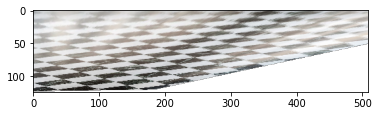

While the second is this other one:

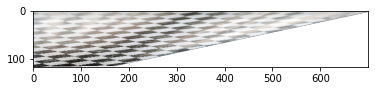

In [9]:
""" 
****************************************************************************************************
************************************ Simpy implementation ******************************************
****************************************************************************************************
"""

NORMALIZE = true

# points definition
scale_1 = 50
points = [[7.81*scale_1 ,509 -(3.33*scale_1),1],[9.95*scale_1, 509 -(2.17*scale_1),1],[11.66*scale_1, 509 -(3.34*scale_1),1],[9.55*scale_1, 509 -(4.28*scale_1),1]] #GEOGE

x_points= [];y_points=[]
for point in points:
  x_points.append(point[0])
  y_points.append(point[1])

x_points.append(points[0][0])
y_points.append(points[0][1])

P1_values = P1.subs([(x1, x_points[0]), (y1, y_points[0]), (z1,1)])

P2_values = P2.subs([(x2, x_points[1]), (y2, y_points[1]), (z2,1)])

P3_values = P3.subs([(x3, x_points[2]), (y3, y_points[2]), (z3,1)])

P4_values = P4.subs([(x4, x_points[3]), (y4, y_points[3]), (z4,1)])

display(Latex('$\\bold{Exercise: 2.1-2.2-2.3}$'))
print("\n")
display(Markdown("The objective of this exercise is to recover parallel lines on the image, in a way of having tiles that appear parallel."))
display(Markdown("The first step of this exercise consists of defining four segments on the parallel sides of an arbitrary tile, that are present in the following image:"))
print("\n");
image = Image.open('./tiles.PNG')
im = np.array(image, dtype=np.uint8)
plt.imshow(im)
plt.show()

print("\n");
display(Markdown("Two segments are in one direction (parallel in the not distorted image) and the others 2 are orthogonal to those ones."))
display(Markdown("In order to define these segments we need to select four points on the image, that are:"))
print("\n")
display(Eq(Eq(S('P1'), P1, evaluate=False), P1_values, evaluate=False))
print("\n")
display(Eq(Eq(S('P2'), P2, evaluate=False), P2_values, evaluate=False))
print("\n")
display(Eq(Eq(S('P3'), P3, evaluate=False), P3_values, evaluate=False))
print("\n")
display(Eq(Eq(S('P4'), P4, evaluate=False), P4_values, evaluate=False))
print("\n")

display(Markdown("Segments and points are shown below directly on the image"))
print("\n");
plt.imshow(im)
plt.plot(x_points,y_points,label='points', marker='o', markersize=5, color="green")
plt.show()

if NORMALIZE:
  points, T1 = normalize_points(points)
  points = np.transpose(points)
print("\n");

display(Markdown("These Segments belongs to a set of lines that we need to compute."))
display(Markdown("Before compute analytically the calculus of the lines matrices, we normalize the points obtaining the following result:"))
P1_values = P1.subs([(x1, round_(points[0][0])), (y1, round_(points[0][1])), (z1,round_(points[0][2]))])
P2_values = P2.subs([(x2, round_(points[1][0])), (y2, round_(points[1][1])), (z2,round_(points[1][2]))])
P3_values = P3.subs([(x3, round_(points[2][0])), (y3, round_(points[2][1])), (z3,round_(points[2][2]))])
P4_values = P4.subs([(x4, round_(points[3][0])), (y4, round_(points[3][1])), (z4,round_(points[3][2]))])
print("\n")
display(Eq(Eq(S('P1'), P1, evaluate=False), P1_values, evaluate=False))
print("\n")
display(Eq(Eq(S('P2'), P2, evaluate=False), P2_values, evaluate=False))
print("\n")
display(Eq(Eq(S('P3'), P3, evaluate=False), P3_values, evaluate=False))
print("\n")
display(Eq(Eq(S('P4'), P4, evaluate=False), P4_values, evaluate=False))
print("\n")


display(Markdown("The corresponding lines are then:"))
print("\n")
result_line1 = P1_values.cross(P2_values).evalf(6)
display(Latex(r'${L_1} = \vec{P_1}\times\vec{P_2}$'))
display(Eq(P1.cross(P2), result_line1, evaluate=False))
print("\n")

result_line2 = P4_values.cross(P3_values).evalf(6)
display(Latex(r'${L_2} = \vec{P_4}\times\vec{P_3}$'))
display(Eq(P4.cross(P3), result_line2, evaluate=False))
print("\n")

result_line3 = P4_values.cross(P1_values).evalf(6)
display(Latex(r'${L_3} = \vec{P_4}\times\vec{P_1}$'))
display(Eq(P4.cross(P1), result_line3, evaluate=False))
print("\n")

result_line4 = P3_values.cross(P2_values).evalf(6)
display(Latex(r'${L_4} = \vec{P_3}\times\vec{P_2}$'))
display(Eq(P3.cross(P2), result_line4, evaluate=False))
print("\n")

line_1 = np.cross(points[0],points[1])
line_2 = np.cross(points[3],points[2])
line_3 = np.cross(points[3], points[0])
line_4 = np.cross(points[2], points[1])

display(Markdown("The subsequent steps are the computation of the two vanishing points and the corresponding vanishing line."))
display(Markdown("Starting from the vanishing points, we have:"))

print("\n")
vanishing_point1_result = result_line2.cross(result_line1).evalf(6)
display(Latex(r'${V_1} = \vec{L_2}\times\vec{L_1}$'))
display(Eq(Eq(v1,v1_matrix,evaluate=false),vanishing_point1_result, evaluate=False))
print("\n")
vanishing_point2_result = result_line4.cross(result_line3).evalf(6)
display(Latex(r'${V_2} = \vec{L_4}\times\vec{L_3}$'))
display(Eq(Eq(v2,v2_matrix,evaluate=false),vanishing_point2_result, evaluate=False))
print("\n")

display(Markdown("We define the vanishing line as the line that lies on V1 and V2."))
print("\n")
vanishing_line_result = (vanishing_point1_result.cross(vanishing_point2_result)).evalf(6)
display(Latex(r'${V_L} = \vec{V_1}\times\vec{V_2}$'))
display(Eq(Eq(vl,vl_matrix,evaluate=false),vanishing_line_result.evalf(6), evaluate=False))

vanishing_point_1 = np.cross(line_2, line_1)
vanishing_point_2 =  np.cross(line_4, line_3)
vanishing_line =  np.cross(vanishing_point_1, vanishing_point_2)

print("\n")
display(Markdown("Having obtained the vanishing line, it's now possible to compute the projectivity transformation Hp."))
print("\n")

Hp_values = Hp.subs([(h11,1), (h12,0), (h13,0), (h21,0), (h22,1), (h23,0), (h31,round_(vanishing_line[0])), (h32,round_(vanishing_line[1])), (h33,round_(vanishing_line[2]))])
display(Eq(Eq(S('H_p'),Hp,evaluate=false),Hp_values, evaluate=False))
print("\n")
display(Markdown("Then we define:"))
display(Latex(r'$ H = H_{a}  H_{p}$'))
display(Markdown("With Ha an affine transformation. We want to test that:"))
display(Latex(r'$ H^{-T}  l^{T} = (0,0,1)^{T}$'))
display(Markdown("Therefore, given the fact that lines transform covariantly, we want to show that H maps the vanishing line to the line at infinity."))
print("\n")
display(Markdown("Ha has been arbitrarily  chosen: (this matrix has been already used in the other exercise)"))
display(Eq(Eq(S('Ha'), Ha, evaluate=False), Ha_values, evaluate=False))
print("\n")
display(Markdown("H is carried out and then computed this test:"))
print("\n")
display(Eq(S('H'), (Ha_values*Hp_values).evalf(6), evaluate=False))

homography_p = np.array([[1,0,0],[0,1,0], vanishing_line.tolist()])
homography_a = np.array([[1.732, -0.25, 1.5],[0.25, 1.732, 1.3],[0.0,0.0,1.0]])
homography = homography_a.dot(homography_p)

h = np.array(homography_p)
h = np.linalg.inv(h)
h = np.matrix.transpose(h)

l = np.matrix.transpose(vanishing_line)
test = np.dot(h,l)
test = np.round(test)

display(Eq(Symbol('{H^{-T}}l^{T}'), Matrix([test[0],test[1],test[2]]), evaluate=False))
print("\n")
display(Markdown("Hence, the test is passed."))
print("\n")
display(Markdown("As the last step before applying the homography Hp we denormalize and transform it in homogeneous coordinates"))
print("\n")

l = vanishing_line @ T1  # vanishing line normalized

l[0] = l[0]/l[2];l[1] = l[1]/l[2];l[2] = l[2]/l[2];

homography_p = np.array([[1, 0, 0],
               [0, 1, 0],
               [l[0], l[1], l[2]]])

Hp_values = Hp.subs([(h11,1), (h12,0), (h13,0), (h21,0), (h22,1), (h23,0), (h31,l[0]), (h32,l[1]), (h33,l[2])])
display(Eq(Eq(S('H_p'),Hp,evaluate=false),Hp_values.evalf(6), evaluate=False))
print("\n")
display(Markdown("Analytically what we want to find is the real world image X, but what we actually compute is the affinely rectified image Xa (see next point)."))
display(Latex(r"$ Hp \space Xa = X' \rightarrow Xa = Hp^{-1} \space X' $"))
display(Markdown("With X' the distorted image taken as input."))
print("\n")

display(Latex("$\\textbf{Conclusion:}$"))
print("\n")
display(Markdown("To conclude we are going to apply the projective transformation, in two different ways."))
display(Markdown('The first using the DLT algorithm, and the second using the predefined function called: "warp" by skimage.'))
print("\n")

im = np.array(image, dtype=np.uint8)

display(Markdown("respectively, the first solution is the following:"))
bounds, nrows, ncols,  trasf, trasf_prec = make_transform(im,homography_p) 

nn,mm  = im.shape[0],im.shape[0]
if max(nn,mm)>1000:
    kk =6
else: kk =5
nsamples = 10**kk         
int_im = get_new_image(nrows,ncols,im,bounds,trasf_prec,nsamples)

plt.imshow(int_im.astype(np.uint8))
plt.show()

print("\n")

tform = tf.ProjectiveTransform(matrix= np.array(homography_p))
warped = skimage.transform.warp(image, tform.inverse) # Xa Hp = X -> Xa = Hp^-1 X
warped = warped[0:117,0:700,:]
display(Markdown("While the second is this other one:"))
plt.imshow(warped)
plt.show()




# Exercise 2.4

Using this procedure hasn't been gotten a metric rectification. In fact, applying the Hp we have only removed the projective distortion and not the affine one which is still present. This process is called affine rectification.

Parallel lines remain parallel under the affine distortion and can see this in the previous part of the exercise, thanks to the rectification of the projective distortion.
As said the affinely rectified image shows parallel lines, however, angles are not the actual one because are affinely distorted.

Therefore In order to have a metric rectification, we have to find the affine transformation Ha, such that $Xp = Ha \space X$, with Xp the image that comes as the result of this exercise and X the real-world image.

Therefore, we have to compute: 

$X = Ha^{-1} \space Xp$



The metric rectification can be exploited using two non-parallel line pairs identified on the affinely rectified image that corresponds to orthogonal lines on the world plane.

In the below cell, has been implemented a metric rectification of the image used in the exercise, to highlight the difference. The result has been zoomed and sliced.


<IPython.core.display.Latex object>

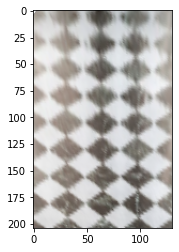

In [10]:
display(Latex('$\\bold{Exercise: 2.4}$'))

def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height))
    result.paste(pil_img, (left, top))
    return result

int_im =int_im.astype(np.uint8)
data = Image.fromarray(int_im)

im_new = add_margin(data, 50, 50, 50, 50, (255, 255, 255))
resized = np.array(im_new)

tile_length = 20

points_Xp = [(296.75873655913983, 85.6723689516129), (314.546370967742, 91.14548723118278), (351.8319892473119, 83.61994959677418), (337.46505376344095, 79.51511088709674)]
points_X = [(296.75873655913983, 85.6723689516129), (296.75873655913983, 85.6723689516129 +tile_length), (296.75873655913983 +tile_length, 85.6723689516129+ tile_length), (296.75873655913983+ tile_length, 85.6723689516129)]

points_Xp = np.array(points_Xp)
points_X  = np.array(points_X)
tform_a =  skimage.transform.estimate_transform('affine', points_Xp, points_X)
tform_a = tform_a.inverse

warped = skimage.transform.warp(resized, tform_a)
warped = skimage.transform.rotate(warped, 52.5)

shape = int_im.shape
new_shape = (int(shape[0]),int(shape[1]*0.2),shape[2])
sliced = warped[20:,230:360,:]
plt.imshow(sliced)
plt.show()


# Exercise 3.1

In [11]:
""" 
****************************************************************************************************
**************************************** Simpy symbols *********************************************
****************************************************************************************************
"""

L1,L2, l1x,l1y,l1z, l2x,l2y,l2z = sp.symbols('L1,L2,lx_{1} ,ly_{1} ,lz_{1} ,lx_{2} ,ly_{2} ,lz_{2} ', real = True)

P11,P12,P21,P22,x11,y11,z11,x12,y12,z12,x21,y21,z21,x22,y22,z22 = sp.symbols("P11,P12,P21,P22,x11,y11,z11,x12,y12,z12,x21,y21,z21,x22,y22,z22", real = True)

L1p,L2p,l1xp,l1yp,l1zp,l2xp,l2yp,l2zp = sp.symbols("L1',L2',lx_{1}',ly_{1}',lz_{1}',lx_{2}',ly_{2}',lz_{2}'", real = True)

P11p,P12p,P21p,P22p,x11p,y11p,z11p,x12p,y12p,z12p,x21p,y21p,z21p,x22p,y22p,z22p = sp.symbols("P_{11}',P_{12}',P_{21}',P_{22}',x_{11}',y_{11}',z_{11}',x_{12}',y_{12}',z_{12}'\
,x_{21}',y_{21}',z_{21}',x_{22}',y_{22}',z_{22}'", real = True)

alpha,s1,s2,t,v,V,t1,t2,v1,v2 = sp.symbols('alpha,s1,s2,t,v,V,t1,t2,v1,v2', real = True)

D1,D2,D1p,D2p = sp.symbols("D1,D2,D1',D2'", real = True)

h11,h12,h13,h21,h22,h23,h31,h32,h33 = sp.symbols('h11,h12,h13,h21,h22,h23,h31,h32,h33', real = True)

""" 
****************************************************************************************************
************************************ Simpy implementation ******************************************
****************************************************************************************************
"""

display(Latex('$\\bold{Exercise: 3.1}$'))
print("\n")
display(Markdown("In this exercise, our aim is to demonstrate, that the ratio of length of parallel line segments is preserved under an affine transformation."))
display(Markdown("We define arbitrary two parallel lines (same angular coefficient) with the following equations:"))
print("\n")
display(Latex(r'$y_{1} = 2x + 1$'))
display(Latex(r'$y_{2} = 2x + 6$'))
print("\n")

display(Markdown("That are represented with these matrices:"))
L1 = Matrix([l1x,l1y,l1z])

L1_values = L1.subs([(l1x, -2), (l1y, 1), (l1z,-1)])

display(Eq(Eq(S('L1'), L1, evaluate=False), L1_values, evaluate=False))
print("\n");

L2 = Matrix([l2x,l2y,l2z])

L2_values = L2.subs([(l2x, -2), (l2y, 1), (l2z,-6)])

display(Eq(Eq(S('L2'), L2, evaluate=False), L2_values, evaluate=False))
print("\n");

display(Markdown("We verify that the cross product between L1 and L2 gives an ideal point"))
print("\n")
display(Latex(r'${P} = \vec{L_1}\times\vec{L_2}$'))
P = L1.cross(L2)
P_values = L1_values.cross(L2_values)
display(Eq(S('P'), P_values, evaluate=False))
print("\n")
display(Markdown("Cause x3 is equal to zero we have an ideal point (point at infinity)"))
print("\n");
display(Markdown("Now we define the points on the line L1 using as x value 1 and 2"))

x = 1
y = lambda x : 2*x +1

P1 = Matrix([x11,y11,z11])
P1_values = P1.subs([(x11, x), (y11, y(x)), (z11,1)])

display(Eq(S('P1'), P1_values, evaluate=False))
print("\n")

x = 2

P2 = Matrix([x12,y12,z12])
P2_values = P2.subs([(x12, x), (y12, y(x)), (z12,1)])

display(Eq(S('P2'), P2_values, evaluate=False))
print("\n");

display(Markdown("We do the same procedure to the points on the line L2 using as x value 1 and 3."))

y = lambda x : 2*x +6
x = 1

P3 = Matrix([x21,y21,z21])
P3_values = P3.subs([(x21, x), (y21, y(x)), (z21,1)])

display(Eq(S('P3'), P3_values, evaluate=False))
print("\n")

x = 3

P4 = Matrix([x22,y22,z22])
P4_values = P4.subs([(x22, x), (y22, y(x)), (z22,1)])

display(Eq(S('P4'), P4_values, evaluate=False))
print("\n");

display(Markdown("We compute now the verification for the points on the lines using the cross product."))
print("\n")

check1 = transpose(L1).dot(P1)
check1_values = int(round((transpose(L1_values).dot(P1_values)),0))
display(Eq(Eq(Symbol("{L1^T}P1"), check1, evaluate=False), check1_values, evaluate=False))

check2 = transpose(L1).dot(P2)
check2_values = int(round((transpose(L1_values).dot(P2_values)),0))
display(Eq(Eq(Symbol("{L1^T}P2"), check2, evaluate=False), check2_values, evaluate=False))


check3 = transpose(L2).dot(P3)
check3_values = int(round((transpose(L2_values).dot(P3_values)),0))
display(Eq(Eq(Symbol("{L2^T}P3"), check3, evaluate=False), check3_values, evaluate=False))

check4 = transpose(L2).dot(P4)
check4_values = int(round((transpose(L2_values).dot(P4_values)),0))
display(Eq(Eq(Symbol("{L2^T}P4"), check4, evaluate=False), check4_values, evaluate=False))

print("\n")
display(Markdown("We compute the distance of the segments between 2 points on a line. Since we want to evaluate the ratio of length for parallel lines\
 it's possible to simplify the distance computation avoiding the usage of the square root."))

D1_values = round(transpose((P1_values-P2_values)).dot(P1_values-P2_values),2)
print("\n")
display(Eq(Eq(Symbol('D1'), Symbol('(P1-P2)^{T} (P1-P2)'), evaluate=False), D1_values, evaluate=False))
print("\n")
D2_values = round(transpose((P3_values-P4_values)).dot(P3_values-P4_values),2)
display(Eq(Eq(Symbol('D2'), Symbol('(P3-P4)^{T} (P3-P4)'), evaluate=False), D2_values, evaluate=False))
print("\n")

display(Markdown("Then we define an affine transformation to perform the new points and lines, using the following parameters:"))
print("\n")

t = Matrix([t1,t2])
v = Matrix([v1,v2])

t_values = t.subs([(t1, 1.5), (t2, 1.3)])
alpha_value = alpha.subs([(alpha, 30)])
s1_value = s1.subs([(s1, 2.0)])
s2_value = s2.subs([(s2, 0.5)])
v_values = v.subs([(v1, 0.0), (v2, 0.0)])


display(Eq(Eq(S('α'), alpha, evaluate=False), alpha_value, evaluate=False))
print("\n");
display(Eq(Eq(S('s1'), s1, evaluate=False), s1_value, evaluate=False))
print("\n");
display(Eq(Eq(S('s2'), s2, evaluate=False), s2_value, evaluate=False))
print("\n");
display(Eq(Eq(S('t'), t, evaluate=False), t_values, evaluate=False))
print("\n");
display(Eq(Eq(S('v'), v, evaluate=False), v_values, evaluate=False))
print("\n");

cos_alpha = round(math.cos(math.radians(alpha_value)), 3)
sin_alpha = round(math.sin(math.radians(alpha_value)), 3)

Ha = sp.Matrix([[h11, h12, h13],[h21, h22, h23],[h31, h32, h33]])
Ha_values = Ha.subs([(h11,cos_alpha*s1_value), (h12,-(sin_alpha*s2_value)), (h13,t_values[0]), (h21,sin_alpha*s2_value), (h22,cos_alpha*s1_value), (h23,t_values[1]), (h31,v_values[0]), (h32,v_values[1]), (h33,1)])
display(Eq(Eq(S('Ha'), Ha, evaluate=False), Ha_values, evaluate=False))
Ha_det = Ha_values.det()

print("\n")
display(Markdown("Now we use the affine transformation to compute the new points. (points trasforms contravariantly)"))
print("\n")

P11p = Matrix([x11p, y11p, z11p])
P12p = Matrix([x12p, y12p, z12p])
P21p = Matrix([x21p, y21p, z21p])
P22p = Matrix([x22p, y22p, z22p])

P11p_values = Ha_values*(P1_values)
P12p_values = Ha_values*(P2_values)
P21p_values = Ha_values*(P3_values)
P22p_values = Ha_values*(P4_values)

display(Eq(Eq(Eq(Symbol("P1'"), P11p, evaluate=False), Ha*(P1), evaluate=False), P11p_values, evaluate=False))
print("\n")
display(Eq(Eq(Eq(Symbol("P2'"), P12p, evaluate=False), Ha*(P2), evaluate=False), P12p_values, evaluate=False))
print("\n")
display(Eq(Eq(Eq(Symbol("P3'"), P21p, evaluate=False), Ha*(P3), evaluate=False), P21p_values, evaluate=False))
print("\n")
display(Eq(Eq(Eq(Symbol("P4'"), P22p, evaluate=False), Ha*(P4), evaluate=False), P22p_values, evaluate=False))
print("\n")

display(Markdown("Now we do the same for the lines (points transforms  covariantly)."))
print("\n")
Ha_inv_values = Ha_values.inv().evalf(3)
display(Eq(Symbol('Ha^{-1}'), Ha.inv(), evaluate=False))
print("\n")
display(Eq(Symbol('Ha^{-1}'), Ha_inv_values, evaluate=False))
print("\n")
display(Markdown("Since has been possible to invert Ha, we can establish that is a non-singular matrix, which is a key property."))
print("\n")

Ha_inv_trans_values = transpose(Ha_values.inv().evalf(3))

display(Eq(Symbol('Ha^{-T}'), Ha_inv_trans_values, evaluate=False))
print("\n")

L1p = Matrix([l1xp, l1yp, l1zp])
L1p_values = Ha_inv_trans_values * L1_values

display(Eq(Eq(Eq(Symbol("L1'"),L1p, evaluate=False), Symbol('H^{-T} L1'), evaluate=False), L1p_values, evaluate=False))
print("\n")
L2p = Matrix([l2xp, l2yp, l2zp])
L2p_values = Ha_inv_trans_values * L2_values

display(Eq(Eq(Eq(Symbol("L2'"),L2p, evaluate=False), Symbol('H^{-T} L2'), evaluate=False), L2p_values, evaluate=False))
print("\n")
display(Markdown("It's important to do the verification about points on the lines one more time with the new values."))
print("\n")

check1 = transpose(L1p).dot(P11p)
check1_values = int(round((transpose(L1p_values).dot(P11p_values)),0))
display(Eq(Eq(Symbol("L1'^{T}P1'"), check1, evaluate=False), check1_values, evaluate=False))

check2 = transpose(L1p).dot(P12p)
check2_values = int(round((transpose(L1p_values).dot(P12p_values)),0))
display(Eq(Eq(Symbol("L1'^{T}P2'"), check2, evaluate=False), check2_values, evaluate=False))

check3 = transpose(L2p).dot(P21p)
check3_values = int(round((transpose(L2p_values).dot(P21p_values)),0))
display(Eq(Eq(Symbol("L2'^{T}P3'"), check3, evaluate=False), check3_values, evaluate=False))
check4 = transpose(L2p).dot(P22p)
check4_values = int(round((transpose(L2p_values).dot(P22p_values)),0))

display(Eq(Eq(Symbol("L2'^{T}P4'"), check4, evaluate=False), check4_values, evaluate=False))
print("\n")
display(Markdown("Finally we evaluate the new pair of distances between the new points."))
print("\n")
D1p_values = round(transpose((P11p_values-P12p_values)).dot((P11p_values-P12p_values)),3)

display(Eq(Eq(Symbol("D1'"), Symbol("(P1'-P2')^{T} (P2'-P2')"), evaluate=False), D1p_values, evaluate=False))
print("\n")
D2p_values = round(transpose((P21p_values-P22p_values)).dot((P21p_values-P22p_values)),3)

display(Eq(Eq(Symbol("D2'"), Symbol("(P3'-P4')^{T} (P3'-P4')"), evaluate=False), D2p_values, evaluate=False))
print("\n")

display(Markdown("The distance between 2 points must be scaled by a factor equal to the determinant of Ha."))
D1p_values = round(D1p_values/Ha_det,3)
D2p_values = round(D2p_values/Ha_det,3)
print("\n")
display(Eq(Eq(Symbol("D1'"),Symbol("D1'/det(H_{a})"), evaluate=False), D1p_values, evaluate=False))
display(Eq(Eq(Symbol("D2'"),Symbol("D2'/det(H_{a})"), evaluate=False), D2p_values, evaluate=False))
print("\n")



display(Latex("$\\textbf{Conclusion:}$"))
print("\n")
display(Markdown("It's now possible to compute the ratio of the length of the segments"))
print("\n")

ratio_values = round(D1_values/D2_values,2)

ratio_valuesp = round(D1p_values/D2p_values,2)

display(Eq(Symbol("D1/D2"),  ratio_values, evaluate=False))
print("\n")
display(Eq(Symbol("D1'/D2'"),  ratio_valuesp, evaluate=False))
print("\n")
display(Eq(Symbol("D1/D2"),  Symbol("D1'/D2'"), evaluate=False))
print("\n")

display(Markdown("From this equality, we can conclude that the ratio of length of parallel lines is preserved"))

<IPython.core.display.Latex object>

In this exercise, our aim is to demonstrate, that the ratio of length of parallel line segments is preserved under an affine transformation.

We define arbitrary two parallel lines (same angular coefficient) with the following equations:

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

That are represented with these matrices:

Eq(Eq(L1, Matrix([
[lx_{1}],
[ly_{1}],
[lz_{1}]])), Matrix([
[-2],
[ 1],
[-1]]))

Eq(Eq(L2, Matrix([
[lx_{2}],
[ly_{2}],
[lz_{2}]])), Matrix([
[-2],
[ 1],
[-6]]))

We verify that the cross product between L1 and L2 gives an ideal point

<IPython.core.display.Latex object>

Eq(P, Matrix([
[ -5],
[-10],
[  0]]))

Cause x3 is equal to zero we have an ideal point (point at infinity)

Now we define the points on the line L1 using as x value 1 and 2

Eq(P1, Matrix([
[1],
[3],
[1]]))

Eq(P2, Matrix([
[2],
[5],
[1]]))

We do the same procedure to the points on the line L2 using as x value 1 and 3.

Eq(P3, Matrix([
[1],
[8],
[1]]))

Eq(P4, Matrix([
[ 3],
[12],
[ 1]]))

We compute now the verification for the points on the lines using the cross product.

Eq(Eq({L1^T}P1, lx_{1}*x11 + ly_{1}*y11 + lz_{1}*z11), 0)

Eq(Eq({L1^T}P2, lx_{1}*x12 + ly_{1}*y12 + lz_{1}*z12), 0)

Eq(Eq({L2^T}P3, lx_{2}*x21 + ly_{2}*y21 + lz_{2}*z21), 0)

Eq(Eq({L2^T}P4, lx_{2}*x22 + ly_{2}*y22 + lz_{2}*z22), 0)

We compute the distance of the segments between 2 points on a line. Since we want to evaluate the ratio of length for parallel lines it's possible to simplify the distance computation avoiding the usage of the square root.

Eq(Eq(D1, (P1-P2)^{T} (P1-P2)), 5)

Eq(Eq(D2, (P3-P4)^{T} (P3-P4)), 20)

Then we define an affine transformation to perform the new points and lines, using the following parameters:

Eq(Eq(α, alpha), 30)

Eq(Eq(s1, s1), 2.0)

Eq(Eq(s2, s2), 0.5)

Eq(Eq(t, Matrix([
[t1],
[t2]])), Matrix([
[1.5],
[1.3]]))

Eq(Eq(v, Matrix([
[v1],
[v2]])), Matrix([
[0.0],
[0.0]]))

Eq(Eq(Ha, Matrix([
[h11, h12, h13],
[h21, h22, h23],
[h31, h32, h33]])), Matrix([
[1.732, -0.25, 1.5],
[ 0.25, 1.732, 1.3],
[  0.0,   0.0,   1]]))

Now we use the affine transformation to compute the new points. (points trasforms contravariantly)

Eq(Eq(Eq(P1', Matrix([
[x_{11}'],
[y_{11}'],
[z_{11}']])), Matrix([
[h11*x11 + h12*y11 + h13*z11],
[h21*x11 + h22*y11 + h23*z11],
[h31*x11 + h32*y11 + h33*z11]])), Matrix([
[2.482],
[6.746],
[    1]]))

Eq(Eq(Eq(P2', Matrix([
[x_{12}'],
[y_{12}'],
[z_{12}']])), Matrix([
[h11*x12 + h12*y12 + h13*z12],
[h21*x12 + h22*y12 + h23*z12],
[h31*x12 + h32*y12 + h33*z12]])), Matrix([
[3.714],
[10.46],
[    1]]))

Eq(Eq(Eq(P3', Matrix([
[x_{21}'],
[y_{21}'],
[z_{21}']])), Matrix([
[h11*x21 + h12*y21 + h13*z21],
[h21*x21 + h22*y21 + h23*z21],
[h31*x21 + h32*y21 + h33*z21]])), Matrix([
[ 1.232],
[15.406],
[     1]]))

Eq(Eq(Eq(P4', Matrix([
[x_{22}'],
[y_{22}'],
[z_{22}']])), Matrix([
[h11*x22 + h12*y22 + h13*z22],
[h21*x22 + h22*y22 + h23*z22],
[h31*x22 + h32*y22 + h33*z22]])), Matrix([
[ 3.696],
[22.834],
[     1]]))

Now we do the same for the lines (points transforms  covariantly).

Eq(Ha^{-1}, Matrix([
[ (h22*h33 - h23*h32)/(h11*h22*h33 - h11*h23*h32 - h12*h21*h33 + h12*h23*h31 + h13*h21*h32 - h13*h22*h31), (-h12*h33 + h13*h32)/(h11*h22*h33 - h11*h23*h32 - h12*h21*h33 + h12*h23*h31 + h13*h21*h32 - h13*h22*h31),  (h12*h23 - h13*h22)/(h11*h22*h33 - h11*h23*h32 - h12*h21*h33 + h12*h23*h31 + h13*h21*h32 - h13*h22*h31)],
[(-h21*h33 + h23*h31)/(h11*h22*h33 - h11*h23*h32 - h12*h21*h33 + h12*h23*h31 + h13*h21*h32 - h13*h22*h31),  (h11*h33 - h13*h31)/(h11*h22*h33 - h11*h23*h32 - h12*h21*h33 + h12*h23*h31 + h13*h21*h32 - h13*h22*h31), (-h11*h23 + h13*h21)/(h11*h22*h33 - h11*h23*h32 - h12*h21*h33 + h12*h23*h31 + h13*h21*h32 - h13*h22*h31)],
[ (h21*h32 - h22*h31)/(h11*h22*h33 - h11*h23*h32 - h12*h21*h33 + h12*h23*h31 + h13*h21*h32 - h13*h22*h31), (-h11*h32 + h12*h31)/(h11*h22*h33 - h11*h23*h32 - h12*h21*h33 + h12*h23*h31 + h13*h21*h32 - h13*h22*h31),  (h11*h22 - h12*h21)/(h11*h22*h33 - h11*h23*h32 - h12*h21*h33 + h12*h23*h31 + h13*h21*h32 - h13*h22*h31)]]))

Eq(Ha^{-1}, Matrix([
[  0.566, 0.0816, -0.954],
[-0.0816,  0.566, -0.613],
[      0,      0,    1.0]]))

Since has been possible to invert Ha, we can establish that is a non-singular matrix, which is a key property.

Eq(Ha^{-T}, Matrix([
[ 0.566, -0.0816,   0],
[0.0816,   0.566,   0],
[-0.954,  -0.613, 1.0]]))

Eq(Eq(Eq(L1', Matrix([
[lx_{1}'],
[ly_{1}'],
[lz_{1}']])), H^{-T} L1), Matrix([
[-1.21],
[0.402],
[0.296]]))

Eq(Eq(Eq(L2', Matrix([
[lx_{2}'],
[ly_{2}'],
[lz_{2}']])), H^{-T} L2), Matrix([
[-1.21],
[0.402],
[ -4.7]]))

It's important to do the verification about points on the lines one more time with the new values.

Eq(Eq(L1'^{T}P1', lx_{1}'*x_{11}' + ly_{1}'*y_{11}' + lz_{1}'*z_{11}'), 0)

Eq(Eq(L1'^{T}P2', lx_{1}'*x_{12}' + ly_{1}'*y_{12}' + lz_{1}'*z_{12}'), 0)

Eq(Eq(L2'^{T}P3', lx_{2}'*x_{21}' + ly_{2}'*y_{21}' + lz_{2}'*z_{21}'), 0)

Eq(Eq(L2'^{T}P4', lx_{2}'*x_{22}' + ly_{2}'*y_{22}' + lz_{2}'*z_{22}'), 0)

Finally we evaluate the new pair of distances between the new points.

Eq(Eq(D1', (P1'-P2')^{T} (P2'-P2')), 15.312)

Eq(Eq(D2', (P3'-P4')^{T} (P3'-P4')), 61.246)

The distance between 2 points must be scaled by a factor equal to the determinant of Ha.

Eq(Eq(D1', D1'/det(H_{a})), 5.0)

Eq(Eq(D2', D2'/det(H_{a})), 20.0)

<IPython.core.display.Latex object>

It's now possible to compute the ratio of the length of the segments

Eq(D1/D2, 0.25)

Eq(D1'/D2', 0.25)

Eq(D1/D2, D1'/D2')

From this equality, we can conclude that the ratio of length of parallel lines is preserved

# Exerise 3.2

In [12]:
""" 
****************************************************************************************************
**************************************** Simpy symbols *********************************************
****************************************************************************************************
"""

P1,P2,P3,I,J = sp.symbols('P_{1},P_{2},P_{3},I,J', real = True) #points
# Values of the points
P1x,P1y,P1z,P2x,P2y,P2z,P3x,P3y,P3z,Ix,Iy,Iz,Jx,Jy,Jz = sp.symbols('p_{1x},p_{1y},p_{1z},p_{2x},p_{2y},p_{2z},\
p_{3x},p_{3y},p_{3z},i_{x},i_{y},i_{z},j_{x},j_{y},j_{z},', real = True)

# Conic equation 
x1,x2,x3,a,b,c,d,e,f = sp.symbols('x_{1},x_{2},x_{3},a,b,c,d,e,f', real = True) #points
conic_coeff = Matrix([a,b,c,d,e,f])
conic_coeff_values = Matrix([a,0,a,1,e,f])
# imaginary value 
i = sp.symbols('i', real = True) #points
P1xs,P1ys,P2xs,P2ys,P3xs,P3ys, P1xsP1ys, P2xsP2ys, P3xsP3ys= sp.symbols('p_{1x}^{2},p_{1y}^{2},p_{2x}^{2},p_{2y}^{2},p_{3x}^{2},\
p_{3y}^{2}, p_{1x}p_{1y}, p_{2x}p_{2y}, p_{3x}p_{3y}', real = True) #points

# conic system
conic_eqs = Matrix([[P1xs,P1xsP1ys,P1ys,P1x,P1y,1],[P2xs,P2xsP2ys,P2ys,P2x,P2y,1],[P3xs,P3xsP3ys,P3ys,P3x,P3y,1]\
,[1,i,-1,0,0,0],[1,-i,-1,0,0,0]])
conic_eqs_values = Matrix([[36,30,25,6,5,1],[81,18,4,9,2,1],[81,72,64,9,8,1],[1,i,-1,0,0,0],[1,-i,-1,0,0,0]])
# make the matrices 

P1 = Matrix([P1x,P1y,P1z])
P2 = Matrix([P2x,P2y,P2z])
P3 = Matrix([P3x,P3y,P3z])
I = Matrix([Ix,Iy,Iz])
J = Matrix([Jx,Jy,Jz])

P1_values = P1.subs([(P1x, 6), (P1y, 5), (P1z,1)])
P2_values = P2.subs([(P2x, 9), (P2y, 2), (P2z,1)])
P3_values = P3.subs([(P3x, 9), (P3y, 8), (P3z,1)])
I_values =  I.subs([(Ix, 1), (Iy, i), (Iz,0)])
J_values =  J.subs([(Jx, 1), (Jy, -i), (Jz,0)])

""" 
****************************************************************************************************
************************************ Simpy implementation ******************************************
****************************************************************************************************
"""

display(Latex('$\\bold{Exercise: 3.2}$'))
print("\n")
display(Markdown("In this exercise we want to demonstrate that a circle can be computed using 3 points and 2 circular points."))
display(Markdown("To make the proof, we define 3 points: P1, P2, P3 and 2 circular points: I and J."))
print("\n")
display(Eq(Eq(S('P1'), P1, evaluate=False), P1_values, evaluate=False))
print("\n")
display(Eq(Eq(S('P2'), P2, evaluate=False), P2_values, evaluate=False))
print("\n")
display(Eq(Eq(S('P3'), P3, evaluate=False), P3_values, evaluate=False))
print("\n")
display(Eq(Eq(S('I'), I, evaluate=False), I_values, evaluate=False))
print("\n")
display(Eq(Eq(S('J'), J, evaluate=False), J_values, evaluate=False))
print("\n")

display(Markdown("We take in account the classical equation of a conic which is:"))
display(Latex(r'${ax_{1}}^{2} + bx_{1}x_{2} + {cx_{2}}^{2} + dx_{1}x_{3} + e x_{2}x_{3} + {fx_{3}}^{2} = 0 $'))
print("\n")
display(Markdown("We construct the system with 5 equations that are carried out substituting  the points inside the conic equation."))


display(Latex(r'$ap_{1x}^{2} + bp_{1x}p_{1y} + cp_{1y}^{2} + dp_{1x} + ep_{1y} + f = 0 $'))
display(Latex(r'$ap_{2x}^{2} + bp_{2x}p_{2y} + cp_{2y}^{2} + dp_{2x} + ep_{2y} + f = 0 $'))
display(Latex(r'$ap_{3x}^{2} + bp_{3x}p_{3y} + cp_{3y}^{2} + dp_{3x} + ep_{3y} + f = 0 $'))
display(Latex(r'$a + b(i) -c = 0$'))
display(Latex(r'$a - b(i) -c = 0$'))
print("\n")
display(Markdown("Solving the last 2 equations from the circular points the result are:"))
display(Latex(r'$a = c$'))
display(Latex(r'$b = 0$'))

display(Markdown("The system written in the matrix form is the following:"))

display(Eq(Eq(MatMul(conic_eqs,conic_coeff), (conic_eqs_values*conic_coeff_values), evaluate=False), Matrix([0,0,0,0,0,0]), evaluate=False)) #check it conic_eqs * conic_coeff

display(Markdown("Having five independent  equations we have five Degrees of freedom, so with 5 points it's possible to define the circle. The sixth is determined from the other five."))
display(Markdown("Solving the equation we obtain:"))
solution = solve((conic_eqs_values*conic_coeff_values), (a, e, f))
display(solution)
print("\n")

display(Latex("$\\textbf{Conclusion:}$"))
print("\n")
display(Markdown("Therefore, the final vector of conic's coefficients is"))
display(Latex(r'$C = \{a=-0.05, b=0, c=-0.05, d=1, e=0.5, f=-5.38\}$'))
display(Markdown("Which has been found fixing the d coefficient  equal to 1."))



<IPython.core.display.Latex object>

In this exercise we want to demonstrate that a circle can be computed using 3 points and 2 circular points.

To make the proof, we define 3 points: P1, P2, P3 and 2 circular points: I and J.

Eq(Eq(P1, Matrix([
[p_{1x}],
[p_{1y}],
[p_{1z}]])), Matrix([
[6],
[5],
[1]]))

Eq(Eq(P2, Matrix([
[p_{2x}],
[p_{2y}],
[p_{2z}]])), Matrix([
[9],
[2],
[1]]))

Eq(Eq(P3, Matrix([
[p_{3x}],
[p_{3y}],
[p_{3z}]])), Matrix([
[9],
[8],
[1]]))

Eq(Eq(I, Matrix([
[i_{x}],
[i_{y}],
[i_{z}]])), Matrix([
[1],
[i],
[0]]))

Eq(Eq(J, Matrix([
[j_{x}],
[j_{y}],
[j_{z}]])), Matrix([
[ 1],
[-i],
[ 0]]))

We take in account the classical equation of a conic which is:

<IPython.core.display.Latex object>

We construct the system with 5 equations that are carried out substituting  the points inside the conic equation.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Solving the last 2 equations from the circular points the result are:

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

The system written in the matrix form is the following:

Eq(Eq(Matrix([
[p_{1x}^{2}, p_{1x}p_{1y}, p_{1y}^{2}, p_{1x}, p_{1y}, 1],
[p_{2x}^{2}, p_{2x}p_{2y}, p_{2y}^{2}, p_{2x}, p_{2y}, 1],
[p_{3x}^{2}, p_{3x}p_{3y}, p_{3y}^{2}, p_{3x}, p_{3y}, 1],
[         1,            i,         -1,      0,      0, 0],
[         1,           -i,         -1,      0,      0, 0]])*Matrix([
[a],
[b],
[c],
[d],
[e],
[f]]), Matrix([
[ 61*a + 5*e + f + 6],
[ 85*a + 2*e + f + 9],
[145*a + 8*e + f + 9],
[                  0],
[                  0]])), Matrix([
[0],
[0],
[0],
[0],
[0],
[0]]))

Having five independent  equations we have five Degrees of freedom, so with 5 points it's possible to define the circle. The sixth is determined from the other five.

Solving the equation we obtain:

{a: -1/18, e: 5/9, f: -97/18}

<IPython.core.display.Latex object>

Therefore, the final vector of conic's coefficients is

<IPython.core.display.Latex object>

Which has been found fixing the d coefficient  equal to 1.

# Exercise 4.0

<IPython.core.display.Latex object>

The aim of this exercise is to provide a simple calibration device.

This exercise has been taken from the example 8.18 of the book "Multiple View Geometry R. Hartley & A. Zisserman"

As a first step, we have loaded the image suggested from the book which represents three squared frames.

The image is the following:

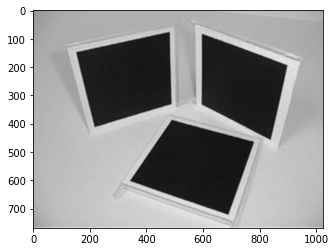

For each frame has been selected 4 points that represent the corners:

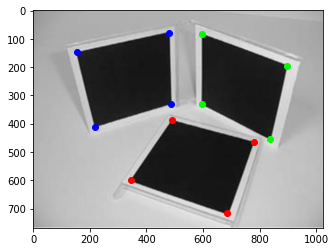

Analytically  the vectors of the points:

1) The right square:

Eq(Eq(PR1, Matrix([
[x1],
[y1],
[z1]])), Matrix([
[837.43508],
[454.32384],
[        1]]))

Eq(Eq(PR2, Matrix([
[x2],
[y2],
[z2]])), Matrix([
[596.07809],
[330.55102],
[        1]]))

Eq(Eq(PR3, Matrix([
[x3],
[y3],
[z3]])), Matrix([
[895.19573],
[194.40093],
[        1]]))

Eq(Eq(PR4, Matrix([
[x4],
[y4],
[z4]])), Matrix([
[596.07809],
[ 84.03683],
[        1]]))

2) The bottom square:

Eq(Eq(PB1, Matrix([
[x1],
[y1],
[z1]])), Matrix([
[685.81338],
[716.30963],
[        1]]))

Eq(Eq(PB2, Matrix([
[x2],
[y2],
[z2]])), Matrix([
[ 344.4067],
[598.72545],
[        1]]))

Eq(Eq(PB3, Matrix([
[x3],
[y3],
[z3]])), Matrix([
[778.64299],
[ 463.6068],
[        1]]))

Eq(Eq(PB4, Matrix([
[x4],
[y4],
[z4]])), Matrix([
[491.90264],
[388.31167],
[        1]]))

3) The left square:

Eq(Eq(PL1, Matrix([
[x1],
[y1],
[z1]])), Matrix([
[487.77688],
[329.51958],
[        1]]))

Eq(Eq(PL2, Matrix([
[x2],
[y2],
[z2]])), Matrix([
[218.57106],
[409.97191],
[        1]]))

Eq(Eq(PL3, Matrix([
[x3],
[y3],
[z3]])), Matrix([
[480.5568],
[77.84819],
[       1]]))

Eq(Eq(PL4, Matrix([
[x4],
[y4],
[z4]])), Matrix([
[153.59028],
[147.98612],
[        1]]))

Then, in the same order as in the book, we define the corner points:

Eq(Eq(PC1, Matrix([
[x1],
[y1],
[z1]])), Matrix([
[0],
[0],
[1]]))

Eq(Eq(PC2, Matrix([
[x2],
[y2],
[z2]])), Matrix([
[1],
[0],
[1]]))

Eq(Eq(PC3, Matrix([
[x3],
[y3],
[z3]])), Matrix([
[0],
[1],
[1]]))

Eq(Eq(PC4, Matrix([
[x4],
[y4],
[z4]])), Matrix([
[1],
[1],
[1]]))

In [13]:
def draw_points(points, color):
  x_points =[];y_points=[]
  for p in points:
    x_points.append(p[0])
    y_points.append(p[1])
  plt.scatter(x_points, y_points,label="points",marker = "o", color = color)


x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4 = sp.symbols('x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4', real = True)
P1,P2,P3,P4 = sp.symbols("P1,P2,P3,P4", real = True)
u1,u2,u3,v1,v2,v3 = symbols('u1,u2,u3,v1,v2,v3', real = True)
a,b,c,d,e,f = symbols('a,b,c,d,e,f', real = True)
coefficients_conic = Matrix([a,b,c,d,e,f])

""" 
****************************************************************************************************
****************************** step by step solution and calculus **********************************
****************************************************************************************************
"""

image = Image.open('./square_frames.png')
im = np.array(image, dtype=np.uint8)

# i define the corner points and the 12 points on the square frames
 
left_up    = [(596.07809, 84.03683),(491.90264, 388.31167),(153.59028, 147.98612)]
right_up   = [(895.19573, 194.40093),(778.64299, 463.60680),(480.55680, 77.84819)]
left_down  = [(596.07809, 330.55102),(344.40670, 598.72545),(218.57106, 409.97191)]
right_down = [(837.43508, 454.32384),(685.813380, 716.30963),(487.77688, 329.51958)]


corner_points = [(0,0),(1,0),(0,1),(1,1)] 
points_1 = [right_down[0], left_down[0], right_up[0], left_up[0]] # right square
points_2 = [right_down[1], left_down[1], right_up[1], left_up[1]] # bottom square
points_3 = [right_down[2], left_down[2], right_up[2], left_up[2]] # left square

# compute homographies using Cv2
H_right, status  = cv2.findHomography(np.array(corner_points), np.array(points_1))
H_bottom, status = cv2.findHomography(np.array(corner_points), np.array(points_2))
H_left, status   = cv2.findHomography(np.array(corner_points), np.array(points_3))

# Definition of the circular points

circular_point_1 = np.array([[1], [1j], [0]]);
circular_point_2 = np.array([[1], [-1j], [0]]);

# Compute imaged circular points

I_right         = np.matmul(H_right, circular_point_1)
I_right_rounded = np.round(I_right, 4)
J_right         = np.matmul(H_right, circular_point_2);
J_right_rounded = np.round(J_right, 4)

I_bottom         = np.matmul(H_bottom, circular_point_1)
I_bottom_rounded = np.round(I_bottom, 4)
J_bottom         = np.matmul(H_bottom, circular_point_2);
J_bottom_rounded = np.round(J_bottom, 4)

I_left         = np.matmul(H_left, circular_point_1)
I_left_rounded = np.round(I_left, 4)
J_left         = np.matmul(H_left, circular_point_2);
J_left_rounded = np.round(J_left, 4)


# takes columns from the imaged circular points
H_11 = H_right[:,0]
H_12 = H_right[:,1]
H_21 = H_bottom[:,0]
H_22 = H_bottom[:,1]
H_31 = H_left[:,0]
H_32 = H_left[:,1]

# we define 5 equations to retrieve the coefficients of the conic

# 5 degrees of freedom for 6 coefficients, therefore, f is chosen as 1.
f = 1

# the conic matrix composition
W = np.array([[a,b/2,d/2],[b/2,c,e/2],[d/2,e/2,f]])

eq1 = sp.Eq( np.dot ( np.dot( np.transpose(H_11), W ), H_12), 0)   
eq2 = sp.Eq( np.dot ( np.dot( np.transpose(H_11), W ), H_11), np.dot ( np.dot( np.transpose(H_12), W ), H_12))   
eq3 = sp.Eq( np.dot ( np.dot( np.transpose(H_21), W ), H_22), 0)   
eq4 = sp.Eq( np.dot ( np.dot( np.transpose(H_21), W ), H_21), np.dot ( np.dot( np.transpose(H_22), W ), H_22))   
eq5 = sp.Eq( np.dot ( np.dot( np.transpose(H_31), W ), H_32), 0)   
eq6 = sp.Eq( np.dot ( np.dot( np.transpose(H_31), W ), H_31), np.dot ( np.dot( np.transpose(H_32), W ), H_32))   


res = sp.solve((eq2, eq3, eq4, eq5, eq6), (a,b,c,d,e,f))

a = res[a]
b = res[b]
c = res[c]
d = res[d]
e = res[e]
# f = 1 


# Built the conic matrix using the coefficients
W = np.zeros((3, 3))

W[0,0] = a
W[0,1] = b/2
W[0,2] = d/2
W[1,0] = b/2
W[1,1] = c
W[1,2] = e/2
W[2,0] = d/2
W[2,1] = e/2
W[2,2] = f

# Compute calibration matrix from W 
W_inv = inv(np.transpose(W))

# K lower triangular matrix
K_lower = lin.cholesky(W_inv)

# K upper triangular matrix
K_upper = np.transpose(K_lower)

""" 
****************************************************************************************************
************************************* simpy implementation *****************************************
****************************************************************************************************
"""

display(Latex('$\\bold{Exercise: 4}$'))
print("\n")

# start of the exercise

display(Markdown("The aim of this exercise is to provide a simple calibration device."))
display(Markdown('This exercise has been taken from the example 8.18 of the book "Multiple View Geometry R. Hartley & A. Zisserman"'))

display(Markdown("As a first step, we have loaded the image suggested from the book which represents three squared frames."))
display(Markdown("The image is the following:"))

plt.imshow(im)
plt.show()

draw_points(points_1,"lime")
draw_points(points_2,"red")
draw_points(points_3,"blue")

display(Markdown("For each frame has been selected 4 points that represent the corners:"))

plt.imshow(im)
plt.show()

display(Markdown("Analytically  the vectors of the points:"))

print("\n")
display(Markdown("1) The right square:"))
print("\n")
PR1 = np.array([x_1, y_1, z_1])
PR2 = np.array([x_2, y_2, z_2])
PR3 = np.array([x_3, y_3, z_3])
PR4 = np.array([x_4, y_4, z_4])

pr1_value = Matrix(PR1).subs([(x_1, points_1[0][0]), (y_1, points_1[0][1]),  (z_1, 1)])
pr2_value = Matrix(PR2).subs([(x_2, points_1[1][0]), (y_2, points_1[1][1]),  (z_2, 1)])
pr3_value = Matrix(PR3).subs([(x_3, points_1[2][0]), (y_3, points_1[2][1]),  (z_3, 1)])
pr4_value = Matrix(PR4).subs([(x_4, points_1[3][0]), (y_4, points_1[3][1]),  (z_4, 1)])

display(Eq(Eq(S('PR1'), Matrix(PR1), evaluate=False), Matrix(pr1_value), evaluate=False));
print("\n")
display(Eq(Eq(S('PR2'), Matrix(PR2), evaluate=False), Matrix(pr2_value), evaluate=False));
print("\n")
display(Eq(Eq(S('PR3'), Matrix(PR3), evaluate=False), Matrix(pr3_value), evaluate=False));
print("\n")
display(Eq(Eq(S('PR4'), Matrix(PR4), evaluate=False), Matrix(pr4_value), evaluate=False));
print("\n")

display(Markdown("2) The bottom square:"))
print("\n")
PB1 = np.array([x_1, y_1, z_1])
PB2 = np.array([x_2, y_2, z_2])
PB3 = np.array([x_3, y_3, z_3])
PB4 = np.array([x_4, y_4, z_4])

pb1_value = Matrix(PB1).subs([(x_1, points_2[0][0]), (y_1, points_2[0][1]),  (z_1, 1)])
pb2_value = Matrix(PB2).subs([(x_2, points_2[1][0]), (y_2, points_2[1][1]),  (z_2, 1)])
pb3_value = Matrix(PB3).subs([(x_3, points_2[2][0]), (y_3, points_2[2][1]),  (z_3, 1)])
pb4_value = Matrix(PB4).subs([(x_4, points_2[3][0]), (y_4, points_2[3][1]),  (z_4, 1)])

display(Eq(Eq(S('PB1'), Matrix(PB1), evaluate=False), Matrix(pb1_value), evaluate=False));
print("\n")
display(Eq(Eq(S('PB2'), Matrix(PB2), evaluate=False), Matrix(pb2_value), evaluate=False));
print("\n")
display(Eq(Eq(S('PB3'), Matrix(PB3), evaluate=False), Matrix(pb3_value), evaluate=False));
print("\n")
display(Eq(Eq(S('PB4'), Matrix(PB4), evaluate=False), Matrix(pb4_value), evaluate=False));
print("\n")

display(Markdown("3) The left square:"))
print("\n")
PL1 = np.array([x_1, y_1, z_1])
PL2 = np.array([x_2, y_2, z_2])
PL3 = np.array([x_3, y_3, z_3])
PL4 = np.array([x_4, y_4, z_4])

pl1_value = Matrix(PL1).subs([(x_1, points_3[0][0]), (y_1, points_3[0][1]),  (z_1, 1)])
pl2_value = Matrix(PL2).subs([(x_2, points_3[1][0]), (y_2, points_3[1][1]),  (z_2, 1)])
pl3_value = Matrix(PL3).subs([(x_3, points_3[2][0]), (y_3, points_3[2][1]),  (z_3, 1)])
pl4_value = Matrix(PL4).subs([(x_4, points_3[3][0]), (y_4, points_3[3][1]),  (z_4, 1)])

display(Eq(Eq(S('PL1'), Matrix(PL1), evaluate=False), Matrix(pl1_value), evaluate=False));
print("\n")
display(Eq(Eq(S('PL2'), Matrix(PL2), evaluate=False), Matrix(pl2_value), evaluate=False));
print("\n")
display(Eq(Eq(S('PL3'), Matrix(PL3), evaluate=False), Matrix(pl3_value), evaluate=False));
print("\n")
display(Eq(Eq(S('PL4'), Matrix(PL4), evaluate=False), Matrix(pl4_value), evaluate=False));
print("\n")

display(Markdown("Then, in the same order as in the book, we define the corner points:"))
print("\n")

PC1 = np.array([x_1, y_1, z_1])
PC2 = np.array([x_2, y_2, z_2])
PC3 = np.array([x_3, y_3, z_3])
PC4 = np.array([x_4, y_4, z_4])

pc1_value = Matrix(PC1).subs([(x_1, corner_points[0][0]), (y_1, corner_points[0][1]), (z_1, 1)])
pc2_value = Matrix(PC2).subs([(x_2, corner_points[1][0]), (y_2, corner_points[1][1]), (z_2, 1)])
pc3_value = Matrix(PC3).subs([(x_3, corner_points[2][0]), (y_3, corner_points[2][1]), (z_3, 1)])
pc4_value = Matrix(PC4).subs([(x_4, corner_points[3][0]), (y_4, corner_points[3][1]), (z_4, 1)])


display(Eq(Eq(S('PC1'), Matrix(PC1), evaluate=False), Matrix(pc1_value), evaluate=False));
print("\n")
display(Eq(Eq(S('PC2'), Matrix(PC2), evaluate=False), Matrix(pc2_value), evaluate=False));
print("\n")
display(Eq(Eq(S('PC3'), Matrix(PC3), evaluate=False), Matrix(pc3_value), evaluate=False));
print("\n")
display(Eq(Eq(S('PC4'), Matrix(PC4), evaluate=False), Matrix(pc4_value), evaluate=False));
print("\n")


In [14]:
display(Latex('$\\bold{Step\space n°1:}$'))
print("\n")
display(Markdown("The first step is the computation of a homography for each square."))
display(Markdown('To reach this goal we have used the apposite function from Cv2 called: "findHomography".'))

display(Markdown('Hence, we carry out the 3 homographies as:'));
print("\n")
display(Eq(S('H_R'), Matrix(H_right).evalf(5), evaluate=False)); 
print("\n")
display(Eq(S('H_B'), Matrix(H_bottom).evalf(5), evaluate=False)); 
print("\n")
display(Eq(S('H_L'), Matrix(H_left).evalf(5), evaluate=False))
print("\n")

CSquare_value = np.array([pc1_value, pc2_value, pc3_value, pc4_value]);

display(Markdown("Before going forward has been checked the correctness of the homographies, using this formula:"))
display(Latex('${P_{ji} = H_j PC_i} $'))
print("\n")
display(Markdown('1) Right square:')); 
print("\n")

display(Eq(Eq(S('PR1'), S('H_R*PC_1'), evaluate=False), Matrix(np.matmul(H_right,CSquare_value[0])).evalf(5) , evaluate=False)); 
print("\n")
display(Eq(Eq(S('PR2'), S('H_R*PC_2'), evaluate=False), Matrix(np.matmul(H_right,CSquare_value[1])).evalf(5) , evaluate=False)); 
print("\n")
display(Eq(Eq(S('PR3'), S('H_R*PC_3'), evaluate=False), Matrix(np.matmul(H_right,CSquare_value[2])).evalf(5) , evaluate=False)); 
print("\n")
display(Eq(Eq(S('PR4'), S('H_R*PC_4'), evaluate=False), Matrix(np.matmul(H_right,CSquare_value[3])).evalf(5) , evaluate=False)); 
print("\n")
display(Markdown('2) Bottom square:')); 
print("\n")
display(Eq(Eq(S('PB1'), S('H_B*PC_1'), evaluate=False), Matrix(np.matmul(H_bottom,CSquare_value[0])).evalf(5) , evaluate=False)); 
print("\n")
display(Eq(Eq(S('PB2'), S('H_B*PC_2'), evaluate=False), Matrix(np.matmul(H_bottom,CSquare_value[1])).evalf(5) , evaluate=False)); 
print("\n")
display(Eq(Eq(S('PB3'), S('H_B*PC_3'), evaluate=False), Matrix(np.matmul(H_bottom,CSquare_value[2])).evalf(5) , evaluate=False)); 
print("\n")
display(Eq(Eq(S('PB4'), S('H_B*PC_4'), evaluate=False), Matrix(np.matmul(H_bottom,CSquare_value[3])).evalf(5) , evaluate=False)); 
print("\n")
display(Markdown('3) Left square:')); 
print("\n")
display(Eq(Eq(S('PL1'), S('H_L*PC_1'), evaluate=False), Matrix(np.matmul(H_left,CSquare_value[0])).evalf(5) , evaluate=False)); 
print("\n")
display(Eq(Eq(S('PL2'), S('H_L*PC_2'), evaluate=False), Matrix(np.matmul(H_left,CSquare_value[1])).evalf(5) , evaluate=False)); 
print("\n")
display(Eq(Eq(S('PL3'), S('H_L*PC_3'), evaluate=False), Matrix(np.matmul(H_left,CSquare_value[2])).evalf(5) , evaluate=False)); 
print("\n")
display(Eq(Eq(S('PL4'), S('H_L*PC_4'), evaluate=False), Matrix(np.matmul(H_left,CSquare_value[3])).evalf(5) , evaluate=False)); 
print("\n")

# normalize and show the actual values

<IPython.core.display.Latex object>

The first step is the computation of a homography for each square.

To reach this goal we have used the apposite function from Cv2 called: "findHomography".

Hence, we carry out the 3 homographies as:

Eq(H_R, Matrix([
[ -157.4,  -115.1, 837.44],
[-77.216, -297.46, 454.32],
[0.14085, -0.1931,    1.0]]))

Eq(H_B, Matrix([
[-302.79,  286.18, 685.81],
[-50.455, -137.58, 716.31],
[0.11212, 0.24832,    1.0]]))

Eq(H_L, Matrix([
[  -287.19, -84.255, 487.78],
[   46.717, -264.15, 329.52],
[-0.082286, -0.1603,    1.0]]))

Before going forward has been checked the correctness of the homographies, using this formula:

<IPython.core.display.Latex object>

1) Right square:

Eq(Eq(PR1, H_R*PC_1), Matrix([
[837.44],
[454.32],
[   1.0]]))

Eq(Eq(PR2, H_R*PC_2), Matrix([
[680.03],
[377.11],
[1.1408]]))

Eq(Eq(PR3, H_R*PC_3), Matrix([
[722.33],
[156.86],
[0.8069]]))

Eq(Eq(PR4, H_R*PC_4), Matrix([
[ 564.93],
[ 79.645],
[0.94774]]))

2) Bottom square:

Eq(Eq(PB1, H_B*PC_1), Matrix([
[685.81],
[716.31],
[   1.0]]))

Eq(Eq(PB2, H_B*PC_2), Matrix([
[383.02],
[665.85],
[1.1121]]))

Eq(Eq(PB3, H_B*PC_3), Matrix([
[ 972.0],
[578.73],
[1.2483]]))

Eq(Eq(PB4, H_B*PC_4), Matrix([
[669.21],
[528.28],
[1.3604]]))

3) Left square:

Eq(Eq(PL1, H_L*PC_1), Matrix([
[487.78],
[329.52],
[   1.0]]))

Eq(Eq(PL2, H_L*PC_2), Matrix([
[ 200.59],
[ 376.24],
[0.91771]]))

Eq(Eq(PL3, H_L*PC_3), Matrix([
[403.52],
[65.369],
[0.8397]]))

Eq(Eq(PL4, H_L*PC_4), Matrix([
[ 116.33],
[ 112.09],
[0.75741]]))

In [15]:
display(Latex('$\\bold{Step \space n°2 \space \& \space n°3 :}$'))
print("\n")
display(Markdown("The second step concerns the evaluation of the imaged circular points for the plane of each square"))
print("\n")

display(Markdown("We formally expose the 2 circuilar points:"))
display(Eq(S('I_'), Matrix(circular_point_1), evaluate=False));
print("\n")
display(Eq(S('J'), Matrix(circular_point_2), evaluate=False));
print("\n")

display(Markdown("Now is possible to apply 3 homography to circular points and determine:"))
display(Latex("${H(1, +i, 0)}\\space{H(1, -i, 0)}$"))
print("\n")
display(Markdown("Follows the computations:"))

display(Markdown('1) Right Square')); 
print("\n")
display(Eq(S('I_L'), Matrix(I_right_rounded).evalf(5), evaluate=False)); 
print("\n")
display(Eq(S('J_L'), Matrix(J_right_rounded).evalf(5), evaluate=False)); 
print("\n")

display(Markdown('2) Bottom Square')); 
print("\n")
display(Eq(S('I_B'), Matrix(I_bottom_rounded).evalf(5), evaluate=False)); 
print("\n")
display(Eq(S('J_B'), Matrix(J_bottom_rounded).evalf(5), evaluate=False)); 
print("\n")

display(Markdown('3) Left Square')); 
print("\n")
display(Eq(S('I_L'), Matrix(I_left_rounded).evalf(5), evaluate=False)); 
print("\n")
display(Eq(S('J_L'), Matrix(J_left_rounded).evalf(5), evaluate=False)); 
print("\n") 

display(Latex("$\\text{Doing this process we've obtained the six circular points.\n Now, as a third step, we fit the conic }\omega \\text{ using the imaged circular points.}$"))
print("\n")
display(Latex("$\\text{For doing this we explicit a set of 5 equations that come respectively as real and imaginary part from the following equation:}$"))
display(Latex('${(h_{1} \pm jh_{2})^T \omega (h_{1} \pm jh_{2}) = 0}$'))
print("\n")
display(Latex("$\\text{With real part:}$"))
display(Latex("${h_1^T ωh_2 = 0}$"))
display(Latex("$\\text{And imaginary part:}$"))
display(Latex("${h_1^T ωh_1 = h_2^T ωh_2}$"))
print("\n")
print("\n")

display(Latex("$\\text{Therefore, has been decided to solve the following system of equation:}$"))
# display(Latex("${{hr_{1}}^T ωhr_{2} = 0}$"))
display(Latex("${{hr_{1}}^T ωhr_{1} = {hr_{2}}^T ωhr_{2}}$"))
display(Latex("${{hb_{1}}^T ωhb_{2} = 0}$"))
display(Latex("${{hb_{1}}^T ωhb_{1} = {hb_{2}}^T ωhb_{2}}$"))
display(Latex("${{hl_{1}}^T ωhl_{2} = 0}$"))
display(Latex("${{hl_{1}}^T ωhl_{1} = {hl_{2}}^T ωhl_{2}}$"))
print("\n")

display(Latex("$\\text{Since we have five degrees of freedom and six coefficients, has been selected f equal to 1.}$"))
display(Latex("$\\text{The coefficients that we have carried out are the following:}$"))
print("\n")

display(Eq(coefficients_conic, Matrix([a,b,c,d,e,1]).evalf(3), evaluate=False))

print("\n")
display(Latex("$\\text{They define this conic } \omega \\text{:}$"))
print("\n")
display(Eq(Symbol("\omega"), Matrix(W).evalf(3), evaluate=False))

print("\n")
display(Latex("$\\text{Before going forward to the next step, has been checked that: }{I_i^T} \omega  {I_i}\\text{ = 0 and }{J_i^T} \omega {J_i}\\text{ = 0}$"))
print("\n")

display(Latex('$\\text{1) For the right square I want to check: }$'))
print("\n")
display(Latex('${Check_I = I_R^T \omega I_R = 0}$'))
display(Latex('${Check_J = J_R^T \omega J_R = 0}$'))
print("\n")
display(Latex('$\\text{Results:}$'));

display(Eq(S('Check_I'), Matrix(np.round(I_right.transpose() @ W @ I_right)), evaluate=False))
display(Eq(S('Check_J'), Matrix(np.round(J_right.transpose() @ W @ J_right)), evaluate=False));
print("\n")


display(Latex('$\\text{2) For the bottom square I want to check: }$'))
print("\n")
display(Latex('${Check_I = I_B^T \omega I_B = 0}$'))
display(Latex('${Check_J = J_B^T \omega J_B = 0}$'))
print("\n")
display(Latex('$\\text{Results:}$'));
display(Eq(S('Check_I'), Matrix(np.round(I_bottom.transpose() @ W @ I_bottom)), evaluate=False))
display(Eq(S('Check_J'), Matrix(np.round(J_bottom.transpose() @ W @ J_bottom)), evaluate=False)); 
print("\n")


display(Latex('$\\text{3) For the left square I want to check: }$'))
print("\n")
display(Latex('${Check_I = I_L^T \omega I_L = 0}$'))
display(Latex('${Check_J = J_L^T \omega J_L = 0}$'))
print("\n")
display(Latex('$\\text{Results:}$'));
display(Eq(S('Check_I'), Matrix(np.round(I_left.transpose() @ W @ I_left)), evaluate=False))
display(Eq(S('Check_J'), Matrix(np.round(J_left.transpose() @ W @ J_left)), evaluate=False));
print("\n")

<IPython.core.display.Latex object>

The second step concerns the evaluation of the imaged circular points for the plane of each square

We formally expose the 2 circuilar points:

Eq(I_, Matrix([
[  1.0],
[1.0*I],
[    0]]))

Eq(J, Matrix([
[   1.0],
[-1.0*I],
[     0]]))

Now is possible to apply 3 homography to circular points and determine:

<IPython.core.display.Latex object>

Follows the computations:

1) Right Square

Eq(I_L, Matrix([
[  -157.4 - 115.1*I],
[-77.216 - 297.46*I],
[ 0.1408 - 0.1931*I]]))

Eq(J_L, Matrix([
[  -157.4 + 115.1*I],
[-77.216 + 297.46*I],
[ 0.1408 + 0.1931*I]]))

2) Bottom Square

Eq(I_B, Matrix([
[-302.79 + 286.18*I],
[-50.455 - 137.58*I],
[ 0.1121 + 0.2483*I]]))

Eq(J_B, Matrix([
[-302.79 - 286.18*I],
[-50.455 + 137.58*I],
[ 0.1121 - 0.2483*I]]))

3) Left Square

Eq(I_L, Matrix([
[-287.19 - 84.255*I],
[ 46.717 - 264.15*I],
[-0.0823 - 0.1603*I]]))

Eq(J_L, Matrix([
[-287.19 + 84.255*I],
[ 46.717 + 264.15*I],
[-0.0823 + 0.1603*I]]))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Eq(Matrix([
[a],
[b],
[c],
[d],
[e],
[f]]), Matrix([
[  7.43e-7],
[  1.61e-7],
[  9.66e-7],
[-0.000707],
[ -0.00089],
[      1.0]]))

<IPython.core.display.Latex object>

Eq(\omega, Matrix([
[  7.43e-7,   8.07e-8, -0.000353],
[  8.07e-8,   9.66e-7, -0.000445],
[-0.000353, -0.000445,       1.0]]))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Eq(Check_I, Matrix([[0]]))

Eq(Check_J, Matrix([[0]]))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Eq(Check_I, Matrix([[0]]))

Eq(Check_J, Matrix([[0]]))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Eq(Check_I, Matrix([[0]]))

Eq(Check_J, Matrix([[0]]))

In [16]:
display(Latex('$\\bold{Step \space n°4}$'))
print("\n")
display(Markdown("Finally in the last step using the Cholesky factorization of the conic, we established the calibration matrix K:"))
print("\n")
display(Eq(S('K'), Matrix(np.round(K_upper, 10)).evalf(5), evaluate=False))
print("\n")
display(Latex('$\\text{ As final verification I check whether }{(KK^T)^{-1} = }\\text{ }\omega \\text{ and by computing this I exactly obtain: }$')); 
print("\n")
display(Eq(Eq(Symbol('(KK^T)^{-1}'), Matrix(inv(K_lower@np.transpose(K_lower))).evalf(3), evaluate=False),Symbol('\omega'), evaluate=False));
print("\n")

display(Latex("$\\textbf{Conclusion:}$"))
print("\n")
display(Latex('$\\text{Has been proven that the matrix } \omega \\text{ is equal to the one already found in the previous computation.}$')); 
display(Latex('$\\text{Throught these steps we have carried out the calibration matrix}{K}$')); 
print("\n")

<IPython.core.display.Latex object>

Finally in the last step using the Cholesky factorization of the conic, we established the calibration matrix K:

Eq(K, Matrix([
[1279.4, 127.55, 0.50881],
[     0, 1141.0, 0.50778],
[     0,      0,     1.0]]))

<IPython.core.display.Latex object>

Eq(Eq((KK^T)^{-1}, Matrix([
[  7.43e-7,   8.07e-8, -0.000353],
[  8.07e-8,   9.66e-7, -0.000445],
[-0.000353, -0.000445,       1.0]])), \omega)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>